In [936]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib as mpl
import warnings

warnings.filterwarnings('ignore')
plt.style.use('dark_background')
mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=['blue'])

### Q1. Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?


In [937]:
#dataset initialization and some light pre-processing:

sales = pd.read_csv('data/Online_Sales.csv')
columns = sales.columns
columns = [str.lower(column) for column in columns]
sales.columns = columns

#change transaction_date to pd.datetime:

sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
sales.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [938]:
df = sales.loc[:,['customerid' , 'transaction_date']]
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = pd.to_datetime(df['transaction_date']).dt.month_name()
df['mnum'] = pd.to_datetime(df['transaction_date']).dt.month
df

,customerid,transaction_date,month,mnum
0,17850,2019-01-01,January,1
1,17850,2019-01-01,January,1
2,17850,2019-01-01,January,1
3,17850,2019-01-01,January,1
4,17850,2019-01-01,January,1
...,...,...,...,...
52919,14410,2019-12-31,December,12
52920,14410,2019-12-31,December,12
52921,14410,2019-12-31,December,12
52922,14600,2019-12-31,December,12


In [939]:
#get first transaction
ftransactions = df.groupby('customerid')['transaction_date'].agg('min').reset_index()
#extract month from transaction_date

ftransactions.rename(columns = {'transaction_date':'first_transaction_date'} , inplace = True)
ftransactions['fmonth'] = ftransactions['first_transaction_date'].dt.month
ftransactions['month'] = ftransactions['first_transaction_date'].dt.month_name()
ftransactions

#group by month

acqs = ftransactions.groupby('month').agg({'customerid':'nunique' , 'fmonth':'first'}).reset_index().sort_values(by = 'fmonth').rename(columns={'customerid':'acquisitions', 'fmonth':'nmonth'}).reset_index(drop=True)

acqs

,month,acquisitions,nmonth
0,January,215,1
1,February,96,2
2,March,177,3
3,April,163,4
4,May,112,5
5,June,137,6
6,July,94,7
7,August,135,8
8,September,78,9
9,October,87,10


### Logic Used:

1. The first transactions are extracted by performing a grouping on each customer and getting the first date they purchased.
2. The resulting dataframe is again grouped by months and aggeregated on transaction counts.

---

### ✅ Insight: Customer Acquisition Rate by Month

**Based on the analysis:**

- 📈 Highest acquisition month: January — 215 new customers

- 📉 Lowest acquisition month: November — 68 new customers

### 🔍 Reason Behind Fluctuations

- January's peak may align with New Year promotions, holiday gift card usage, or seasonal marketing.

- November's low may reflect pre-holiday shopping hesitation, or competitive discounting elsewhere pulling traffic away.

---

### ✅ Recommended Strategies for Consistent Growth

- Replicate January’s successful campaigns:

  - Analyze offers, creatives, channels, and audience segments used.

  - Use similar promotions in low-performing months (e.g., November, September).

- Mid-year engagement push:

  - Run flash sales, influencer campaigns, or loyalty point multipliers in May–July to sustain mid-year growth.

- Personalized re-targeting:

  - Use lookalike audiences based on high-LTV customers from January to drive new acquisition.

- Pre-holiday teaser events:

  - In October/November, use early-bird Black Friday access or “mystery discounts” to prevent the dip seen in November.

- Referral programs:

  - Encourage current customers to bring in new ones during off-peak months with tiered rewards.

- Content-driven acquisition:

  - Run seasonal buying guides, blogs, or webinars to generate organic interest in slow months.

- Influencer & partnership leverage:

  - Use micro-influencers in off-peak periods to promote limited-time acquisition discounts.


### Q2. Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?


In [940]:
acqs
# plt.plot(acqs['month'] , acqs['acquisitions'])
# print(acqs.dtypes)
# print(type(acqs['month'].iloc[0]))
# print(type(acqs['acquisitions'].iloc[0]))

,month,acquisitions,nmonth
0,January,215,1
1,February,96,2
2,March,177,3
3,April,163,4
4,May,112,5
5,June,137,6
6,July,94,7
7,August,135,8
8,September,78,9
9,October,87,10


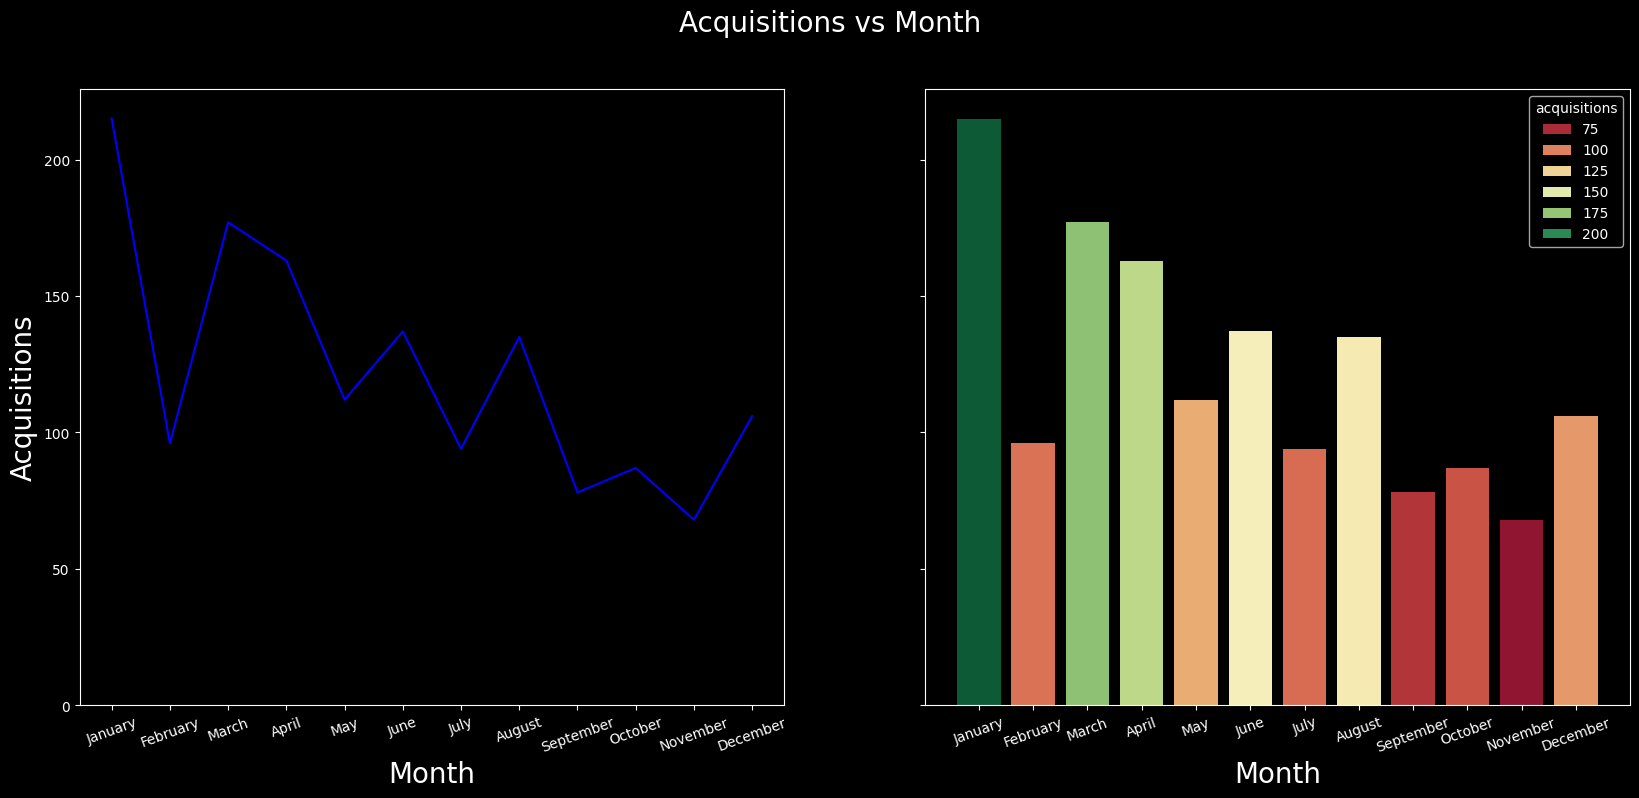

In [941]:
#accusitations throughout the year:
fig , axes = plt.subplots(1,2 , figsize = (20,8) , sharey = True)
plt.sca(axes[0])
sns.lineplot(acqs , x = 'month' , y = 'acquisitions')
plt.xticks(rotation = 20)
plt.ylabel('Acquisitions' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
plt.plot()

plt.sca(axes[1])
sns.barplot(acqs , x = 'month' , y = 'acquisitions' , hue = 'acquisitions' , palette='RdYlGn')
plt.xticks(rotation = 20)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Acquisitions' , fontsize = 20)
plt.plot()
fig.suptitle('Acquisitions vs Month' , fontsize = 20)
plt.savefig('./images/q2.png')

### Logic Used:

-Simply plot the data.

---

### **🔍 Insights: High vs Low Consistency:**

### ✅ Consistently High-Performing Months

- January (highest): post-holiday engagement, New Year campaigns.

- March–April: likely driven by spring promotions.

- July: mid-year spike, possibly clearance or back-to-school prep.

### 🚫 Consistently Low-Performing Months

- September & November: possibly due to:

  - Minimal promotions

  - Holiday budget saving

  - Market competition

---

### ✅ Strategies to Capitalize on Trends

- For High-Performing Months:

  - Audit and Reuse Campaigns

  - Analyze creatives, offers, and timing that worked in Jan/March.

  - Replicate strategies with minor tweaks in low-performing months.

  - Expand Budget Allocation

  - Allocate more marketing spend to high-performing months to amplify ROI.

  - Leverage Referrals

  - Introduce referral drives in strong months to extend their tail impact.

- For Low-Performing Months:

  - Launch Pre-Sale Campaigns

  - Run teaser deals in August and October to energize acquisition before Sep/Nov slumps.

  - Personalized Ads

  - Use behavioral retargeting to convert passive shoppers during slow periods.

  - Geo-Targeted Offers

  - Use location-based discounts if certain regions underperform.

  - Experiment with A/B Tests

  - Trial different offers, timings, and creatives to test what works in slower months.

---

### **📌 Final Thought:**

- Capitalizing on high months while strategically improving slower months creates a balanced, sustainable acquisition engine that avoids over-reliance on seasonal spikes.


### Q3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?


In [942]:
fdf = ftransactions.loc[:,['customerid' , 'first_transaction_date']]
# fdf

mdf = pd.merge(df , fdf)
repeateddf = mdf[mdf['transaction_date'] > mdf['first_transaction_date']]
repeateddf['fmonth'] = repeateddf['first_transaction_date'].dt.month_name()
repeateddf['fmonthnum'] = repeateddf['first_transaction_date'].dt.month


ret = repeateddf.groupby('month').agg({'customerid':'nunique' , 'mnum' : 'first'}).sort_values(by = 'mnum').reset_index()
ret.rename(columns = {'customerid':'retentions'} , inplace = True)
ret

,month,retentions,mnum
0,January,39,1
1,February,40,2
2,March,64,3
3,April,91,4
4,May,111,5
5,June,137,6
6,July,160,7
7,August,185,8
8,September,128,9
9,October,143,10


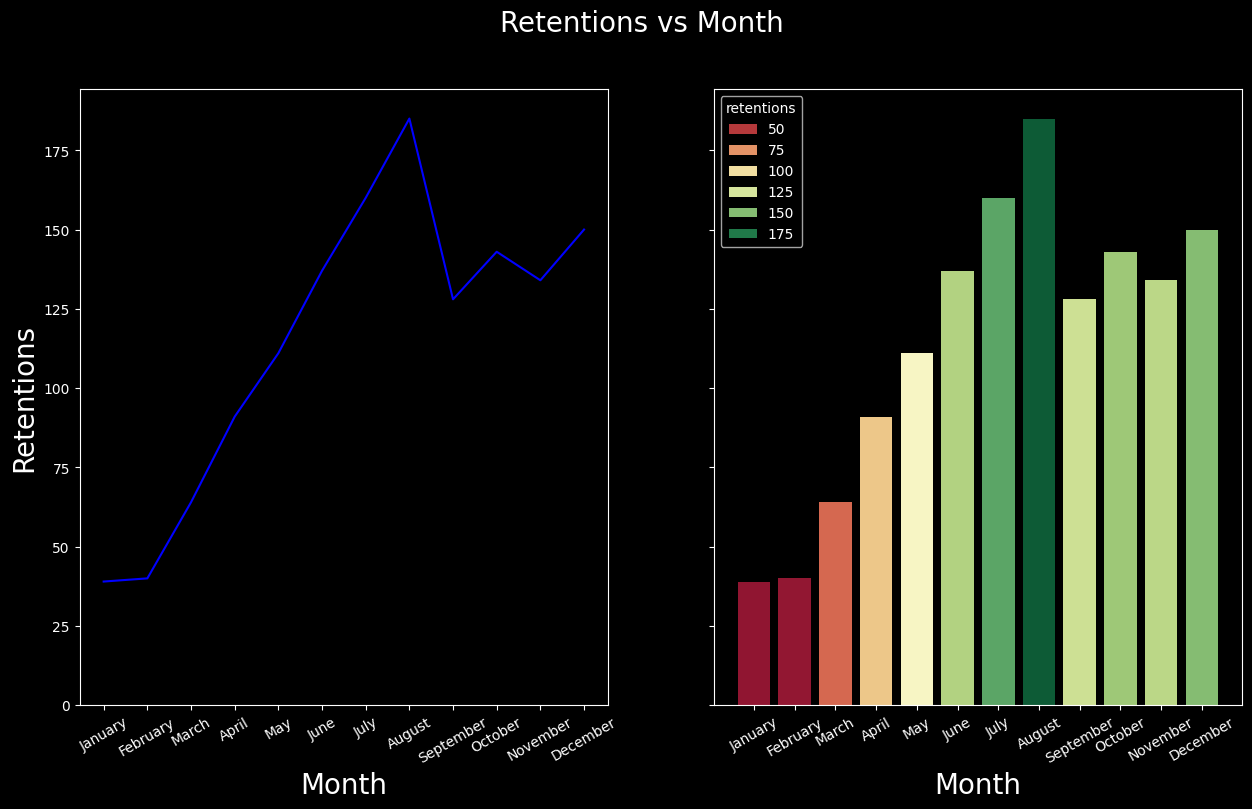

In [943]:
fig , axes = plt.subplots(1, 2, figsize = (15 , 8) , sharey = True)

plt.sca(axes[0])
sns.lineplot(ret , x = 'month' , y = 'retentions')
plt.xticks(rotation = 30)
plt.ylabel('Retentions' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
plt.plot()

plt.sca(axes[1])
sns.barplot(ret , x = 'month' , y = 'retentions' , hue = 'retentions' , palette='RdYlGn')
plt.xticks(rotation = 30)
plt.ylabel('Retentions' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
fig.suptitle('Retentions vs Month' , fontsize = 20)
plt.plot()
plt.savefig('./images/q3.png')

### Logic Used:

- The transactions which occur after the first transaction for a customer are counted as repeated transactions.

---

### ✅ Strongest Retention Periods (based on bar chart):

- August (peak retention)

- July, June, December (also strong)

* These months show high retention numbers, supported by prior high acquisitions. Likely contributing factors:

  1.Seasonal campaigns

  2.Mid-year and year-end promotions

  3.Better onboarding during peak months

---

### 🚫 Weakest Retention Periods:

**January & February have the lowest retention, despite steady acquisition**

- Possible reasons:

  - Low post-holiday engagement

  - Weak retention campaigns or delayed follow-up

  - First-time buyers who didn’t find immediate value

---

### 🔁 Retention Strategy Recommendations

- For Weak Months (Jan–Feb):

  - Post-Purchase Nudges:

  * Trigger targeted emails or WhatsApp messages 3–5 days post-purchase with tailored product suggestions.

  - Limited-Time Return Incentives:Offer a discount if the user returns within 10–15 days of their first purchase.

  - Holiday Recovery Campaigns:Run campaigns like "New Year Comeback Deals" to bring back buyers post-holidays.

* For Strong Months (Jun–Aug, Dec):

  - Build Loyalty Triggers:

    - Set up milestone rewards (e.g., “3 orders = free delivery”) to maintain retention momentum.

  - Leverage High-LTV Customers:

    - Use their behavior to create lookalike audiences for targeted ads in weak months.

  - Survey and Feedback Loops:

    - Identify what delighted customers in strong months and replicate messaging/timing.


### Q.4 Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.


In [944]:
customers = pd.read_excel('data/CustomersData.xlsx')
customers.columns = [str.lower(column) for column in customers.columns]
customers

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [945]:
ftransactions

,customerid,first_transaction_date,fmonth,month
0,12346,2019-09-15,9,September
1,12347,2019-03-24,3,March
2,12348,2019-06-22,6,June
3,12350,2019-12-14,12,December
4,12356,2019-09-15,9,September
...,...,...,...,...
1463,18259,2019-04-05,4,April
1464,18260,2019-06-22,6,June
1465,18269,2019-04-05,4,April
1466,18277,2019-10-23,10,October


In [946]:
cdf = pd.merge(repeateddf , customers , on = 'customerid')
cdf

,customerid,transaction_date,month,mnum,first_transaction_date,fmonth,fmonthnum,gender,location,tenure_months
0,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
1,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
2,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
3,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
4,14688,2019-01-02,January,1,2019-01-01,January,1,F,New York,46
...,...,...,...,...,...,...,...,...,...,...
26958,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26959,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26960,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33
26961,14606,2019-12-31,December,12,2019-01-16,January,1,F,Chicago,33


In [947]:
repeatedLocations = cdf.groupby('month').agg({'location':'value_counts'}).rename(columns = {'location':'lfreq'}).reset_index()
locations = pd.merge(repeatedLocations , ret , left_on='month' , right_on='month').sort_values(by = 'mnum')
locations.head()

,month,location,lfreq,retentions,mnum
24,January,Washington DC,39,39,1
23,January,New Jersey,68,39,1
22,January,New York,78,39,1
21,January,California,246,39,1
20,January,Chicago,323,39,1


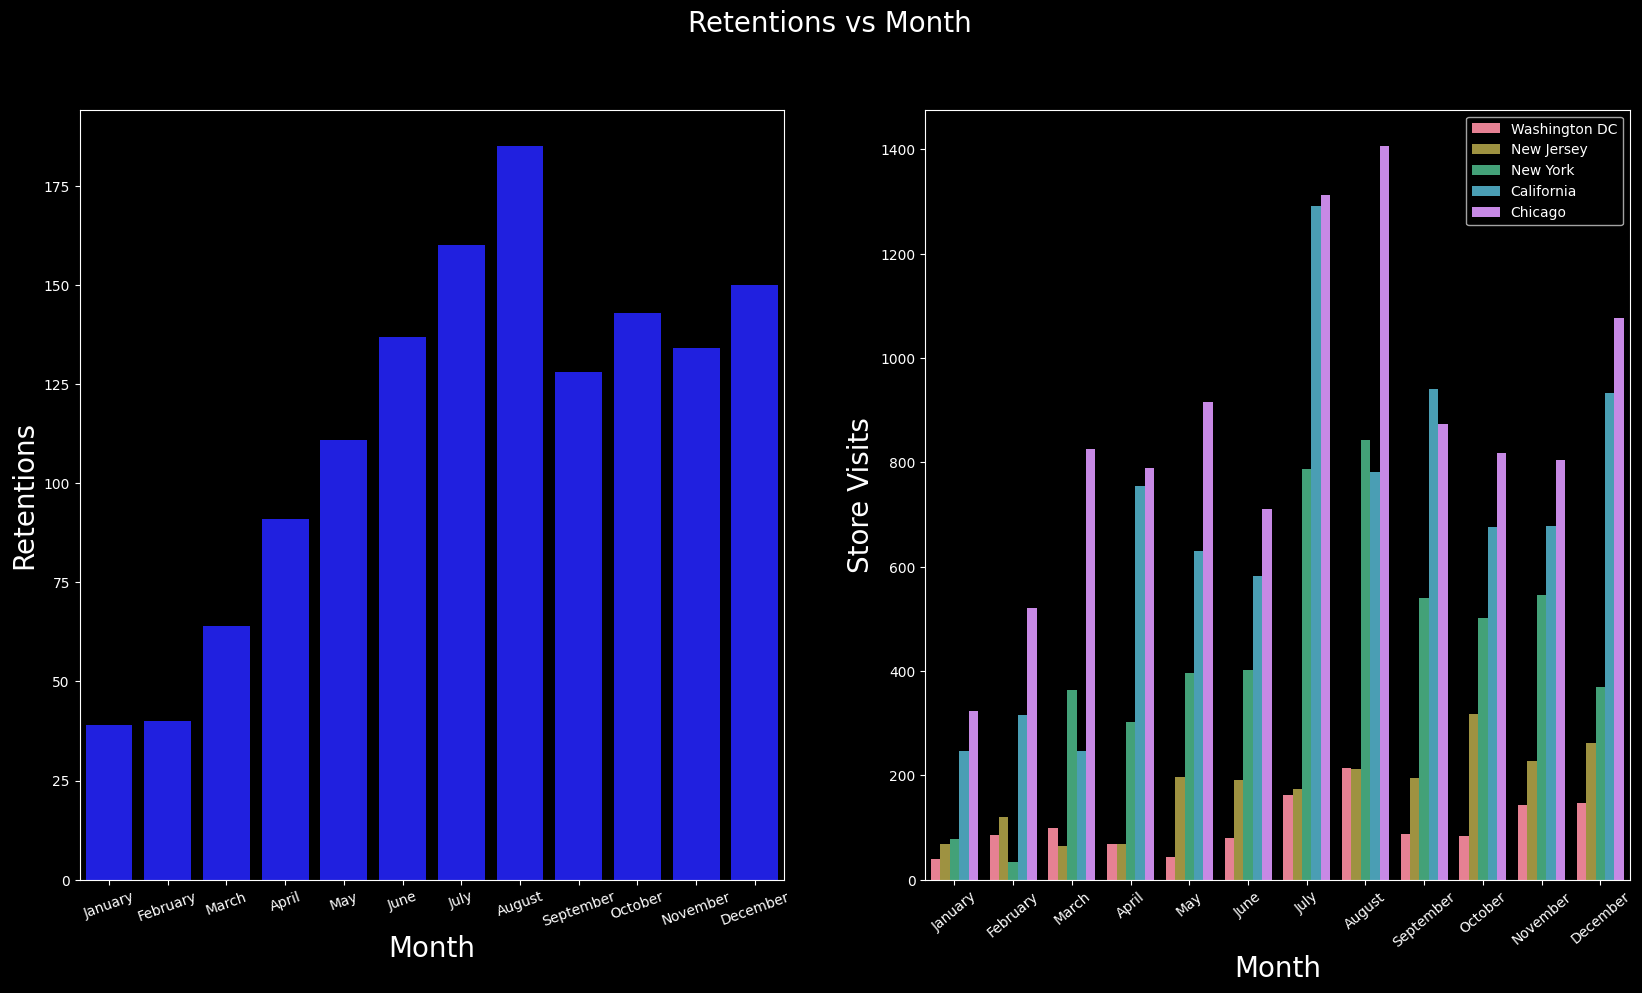

In [948]:
fig , axes = plt.subplots(1, 2, figsize = (20 , 10))
plt.sca(axes[0])
sns.barplot(locations , x = 'month' , y = 'retentions')
plt.xticks(rotation = 20)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Retentions' , fontsize = 20)
fig.suptitle('Retentions vs Month' , fontsize = 20)


plt.sca(axes[1])
sns.barplot(locations , x = 'month' , y = 'lfreq' , hue = 'location')
plt.xticks(rotation = 40)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Store Visits' , fontsize = 20)
plt.legend()

plt.savefig('./images/q4.png')

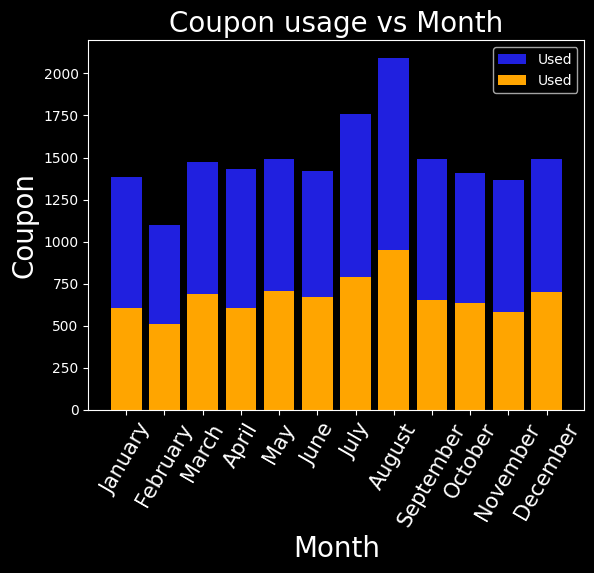

In [949]:
df = sales
df['month'] = df['transaction_date'].dt.month_name()
df['nmonth'] = df['transaction_date'].dt.month
cusage = df.groupby('month').agg({'coupon_status':'value_counts'}).rename(columns = {'coupon_status':'freq'}).unstack()
cusage.columns = [col[1] for col in cusage.columns]

months = sales.groupby('month').agg({'nmonth':'first'})
mcusage = months.merge(cusage , on = 'month')

mcusage.sort_values('nmonth' , inplace = True)

sns.barplot(mcusage , x = 'month' , y = 'Used' , label = 'Used')
plt.bar(mcusage.index, mcusage['Not Used'] , color = 'orange' , label = 'Used')
plt.xticks(rotation = 60 , fontsize = 15)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Coupon' , fontsize = 20)
plt.legend()
plt.title('Coupon usage vs Month' , fontsize = 20)
plt.plot()
plt.savefig('./images/q4.2.png')
# sns.barplot(mcusage , x = 'month' , y = 'Not Used')
# mcusage

### **Logic Used:**

- Calculate monthly retentions.
- Aggregate different statistics from different features to analyse during different retention periods.

---

### **🔍 Analysis: Customer Behavior During High-Retention Months**

**📈 Step 1: Identifying High-Retention Months**

- From your previous retention matrix and data:
  |Month | Retention Count | Observation.|
  |-------|-----------|-|
  |August |Highest(185) |Late Q3 peak, possibly due to campaigns or seasonal reactivation.|
  |July | High(160) | Strong mid-year engagement.|
  |December | High(150) | Holiday season, promotional offers.|
  |October–November | High | End-of-year momentum from festive campaigns.|

---

### **🧠 Step 2: Behavior Patterns in High-Retention Months**

- ✅ Common Trends:

  - High coupon usage (seen in July–December).

  - Increased marketing spend (particularly November–December).

  - Product focus: Categories like Nest-USA, Apparel, and Lifestyle spike during these periods.

  - Delivery tier engagement: Mostly mid-tier delivery, suggesting balance of cost and convenience.

  - Average transaction value holds steady, not significantly discounted—indicating healthy margins.

---

### **🎯 Step 3: Strategies to Replicate High-Retention Success Across the Year**

| Retention Driver             | Strategy to Scale Year-Round.                                                                          |
| ---------------------------- | ------------------------------------------------------------------------------------------------------ |
| 🎁 Effective Coupon Use      | Launch rotating monthly coupons tied to product categories (e.g., electronics in Jan, apparel in Mar). |
| 💬 Marketing Spend ROI       | Reallocate budget from low-ROI months to repeat what works in July–Dec: targeted ads, remarketing.     |
| 🛍️ Category-Driven Retention | Promote seasonal bestsellers outside their core months (e.g., smart home bundles in Q2).               |
| 🚚 Delivery Experience       | Extend mid-tier delivery incentives (e.g., free delivery on orders over ₹X in slow months).            |
| 📆 Customer Milestone Offers | Send personalized offers on customer anniversaries, birthdays, or monthly loyalty streaks.             |
| 🔁 Engagement Hooks          | Use tactics like “2nd Purchase Coupons” and next-purchase incentives in Q1 & Q2.                       |

- 💡 Example Action Plan:

  - Month Campaign Focus Retention Tactic
  - January New Year Essentials (Office, Apparel) Bonus points for 2+ orders
  - April Summer Ready (Drinkware, Bags) Free shipping on 2nd order
  - June Mid-Year Sale Rehearsal Flash coupon + early access preview
  - September Festive Warm-Up (Gift Cards, Lifestyle) Retarget lapsed customers with bundles

---

### **✅ Final Takeaway:**

- High-retention periods thrive on well-timed, personalized, and value-driven engagement.
- By analyzing behavior in July–December, the company can implement smartly timed campaigns, delivery incentives, and product targeting to replicate retention spikes throughout the year.


In [950]:
coupons = pd.read_csv('./data/Discount_Coupon.csv')
coupons.columns = [str.lower(column) for column in coupons.columns]
coupons.head()

,month,product_category,coupon_code,discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [951]:
# convert short form of months to long
months = coupons['month']
coupons['month'] = pd.to_datetime(months , format = '%b').dt.month_name()
coupons.head()

,month,product_category,coupon_code,discount_pct
0,January,Apparel,SALE10,10
1,February,Apparel,SALE20,20
2,March,Apparel,SALE30,30
3,January,Nest-USA,ELEC10,10
4,February,Nest-USA,ELEC20,20


In [952]:
mdf = locations.merge(coupons , on = 'month' , how = 'left')
mdf.head()

,month,location,lfreq,retentions,mnum,product_category,coupon_code,discount_pct
0,January,Washington DC,39,39,1,Apparel,SALE10,10
1,January,Washington DC,39,39,1,Nest-USA,ELEC10,10
2,January,Washington DC,39,39,1,Office,OFF10,10
3,January,Washington DC,39,39,1,Drinkware,EXTRA10,10
4,January,Washington DC,39,39,1,Lifestyle,EXTRA10,10


In [953]:
gdf = mdf.groupby('month').agg({'discount_pct':'mean' , 'retentions':'max' ,'mnum':'first'}).reset_index().sort_values(by='mnum')
gdf

,month,discount_pct,retentions,mnum
4,January,10.0,39,1
3,February,20.0,40,2
7,March,30.0,64,3
0,April,10.0,91,4
8,May,20.0,111,5
6,June,30.0,137,6
5,July,10.0,160,7
1,August,20.0,185,8
11,September,30.0,128,9
10,October,10.0,143,10


[]

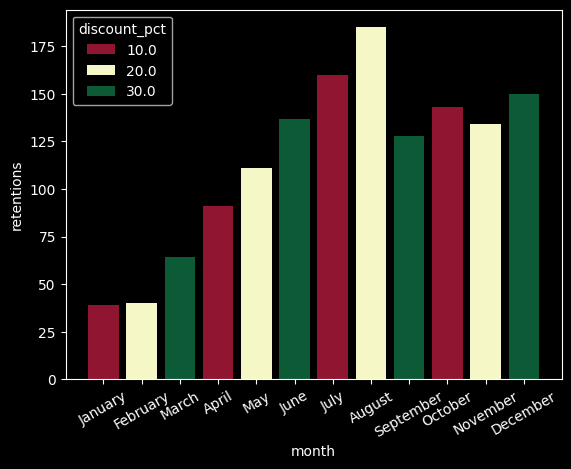

In [954]:
sns.barplot(gdf , x = 'month' , y = 'retentions' , hue = 'discount_pct' , palette='RdYlGn')
plt.xticks(rotation = 30)
plt.plot()

### Q5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?


In [955]:
#get revenue generated by first purchases
purchases = pd.read_csv('./data/Online_Sales.csv')
purchases.columns = [str.lower(column) for column in purchases.columns]
purchases['transaction_date'] = pd.to_datetime(purchases['transaction_date'])
purchases['mnum'] = purchases['transaction_date'].dt.month
purchases['month'] = purchases['transaction_date'].dt.month_name()
purchases['revenue'] = purchases['avg_price'] * purchases['quantity']
purchases.head()


,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [956]:
# group by customers to get first and later purchases by each customer

gdf = purchases.groupby('customerid').agg({'transaction_date':'first'}).reset_index().rename(columns = 
{'transaction_date':'first_transaction_date'}).merge(purchases , on = 'customerid' , how = 'right')
gdf.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [957]:
first_purchases = gdf[gdf['transaction_date'] == gdf['first_transaction_date']]
first_purchases.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [958]:
monthly_first_purchases = first_purchases.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).sort_values(by = 'mnum')
monthly_first_purchases

,revenue,mnum
month,,
January,323744.46,1
February,200818.93,2
March,234593.76,3
April,172152.33,4
May,153077.16,5
June,172170.63,6
July,103836.55,7
August,167440.86,8
September,132004.07,9


In [959]:
repeated_purchses = gdf[gdf['transaction_date'] > gdf['first_transaction_date']]
repeated_purchses.head()

,customerid,first_transaction_date,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
89,14688,2019-01-01,16737,2019-01-02,GGOEGHPJ080110,Google 5-Panel Cap,Headgear,2,19.59,6.5,Clicked,1,January,39.18
90,14688,2019-01-01,16738,2019-01-02,GGOEAKDH019899,Windup Android,Lifestyle,2,3.29,6.5,Clicked,1,January,6.58
91,14688,2019-01-01,16739,2019-01-02,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,122.77,6.5,Not Used,1,January,122.77
92,14688,2019-01-01,16740,2019-01-02,GGOENEBJ081899,Nest Learning Thermostat 3rd Gen - CA - Stainl...,Nest-Canada,1,205.30,8.7,Used,1,January,205.30
93,14688,2019-01-01,16740,2019-01-02,GGOENEBQ081699,Nest Protect Smoke + CO White Battery Alarm - CA,Nest-Canada,3,107.29,8.7,Clicked,1,January,321.87


In [960]:
monthly_repeated_purchases = repeated_purchses.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).sort_values(by = 'mnum')
monthly_repeated_purchases

,revenue,mnum
month,,
January,79880.12,1
February,110000.87,2
March,115014.33,3
April,229466.09,4
May,154686.26,5
June,148910.75,6
July,268801.52,7
August,233769.51,8
September,228544.33,9


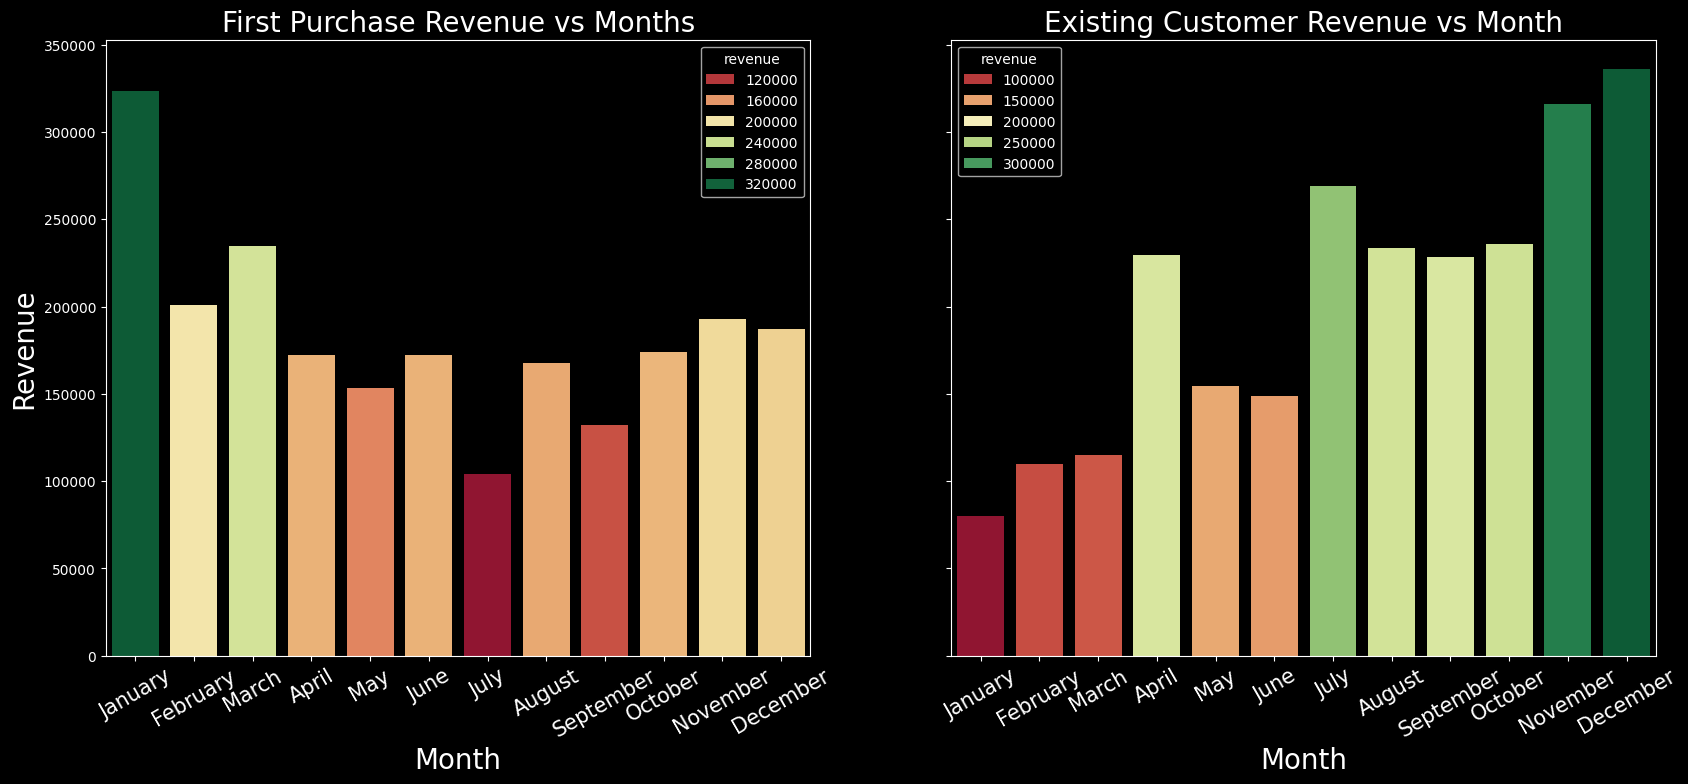

In [961]:
fig , axes = plt.subplots(1,2 , figsize = (20,8) , sharey=True)
plt.sca(axes[0])
sns.barplot(monthly_first_purchases , x = 'month' , y = 'revenue' , hue = 'revenue' , palette= 'RdYlGn')
plt.xticks(rotation = 30, fontsize = 15)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
plt.title('First Purchase Revenue vs Months' , fontsize = 20)
# plt.show()

plt.sca(axes[1])
sns.barplot(monthly_repeated_purchases , x = 'month' , y = 'revenue' , hue = 'revenue' , palette= 'RdYlGn')
plt.xticks(rotation = 30 , fontsize = 15)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
plt.title('Existing Customer Revenue vs Month' , fontsize = 20)
# plt.show()
plt.savefig('images/q5.png')


In [962]:
monthly_repeated_purchases.head()
monthly_first_purchases.head()

,revenue,mnum
month,,
January,323744.46,1
February,200818.93,2
March,234593.76,3
April,172152.33,4
May,153077.16,5


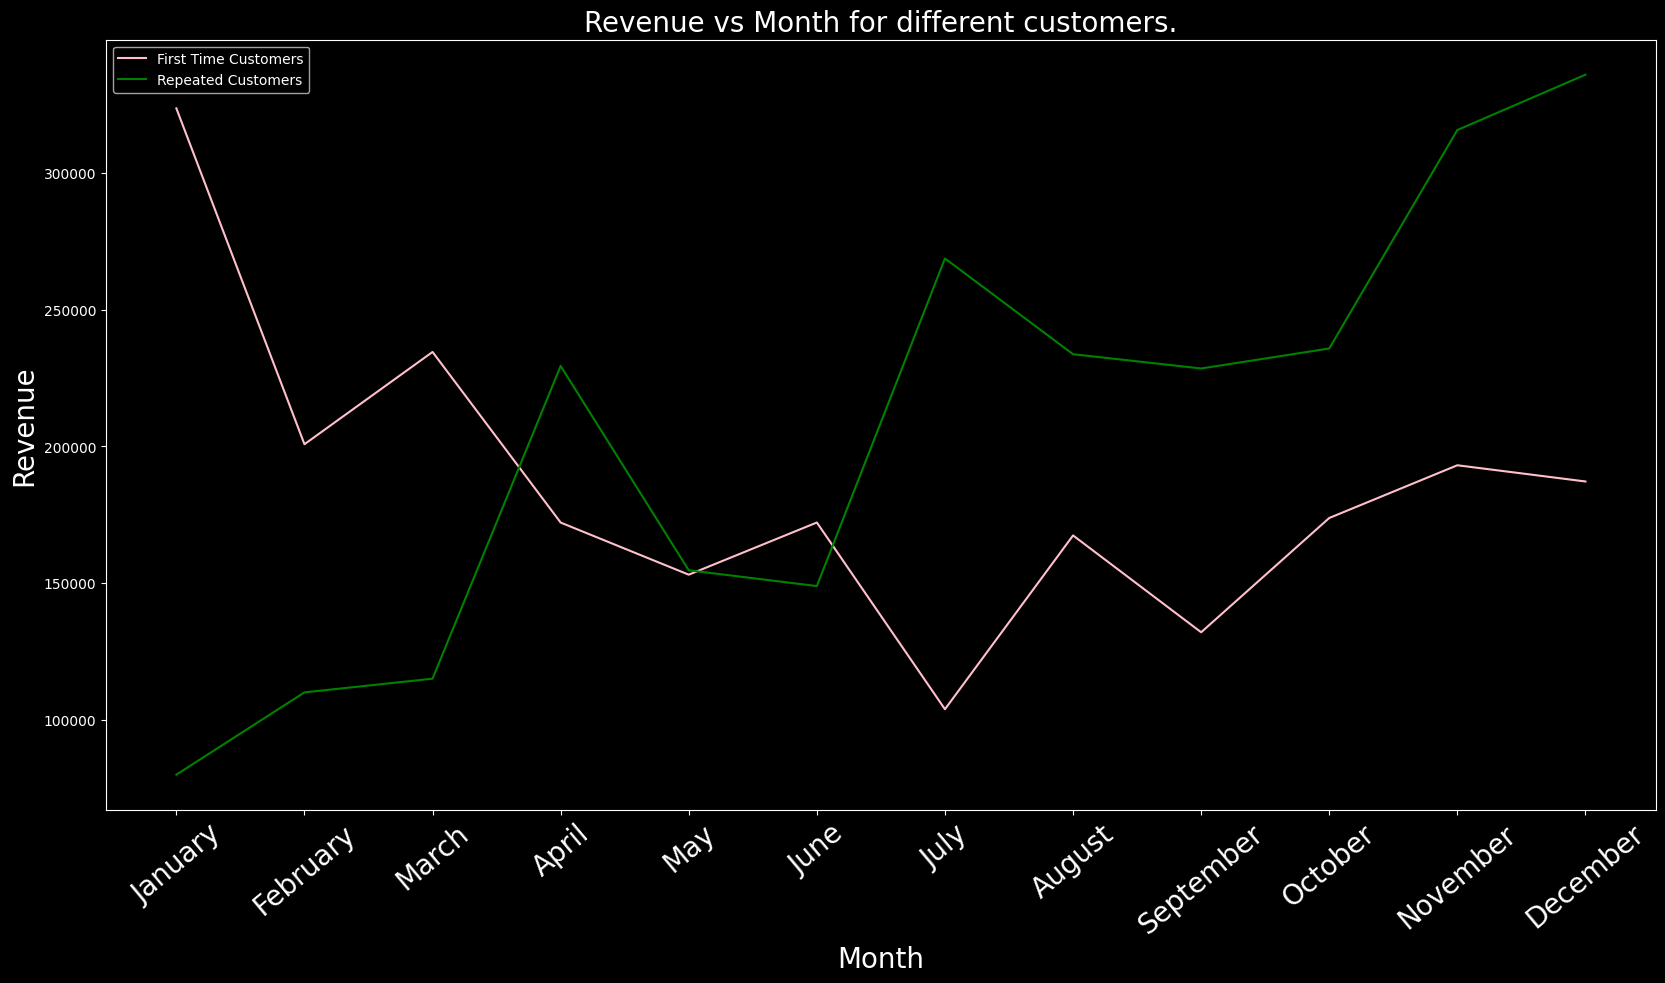

In [963]:

plt.figure(figsize=(20,10))
sns.lineplot(monthly_first_purchases , x = 'month' , y = 'revenue' , label = 'First Time Customers' , color = 'pink')
plt.plot(monthly_repeated_purchases.index , monthly_repeated_purchases['revenue'] , label = 'Repeated Customers' , color = 'green')
plt.xticks(rotation = 40 , fontsize = 20)
plt.legend()
plt.title('Revenue vs Month for different customers.' , fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
# plt.grid()
# plt.show()
plt.savefig('./images/q5.2.png')

### Logic Used:

- Subset the data according to purchase type.

### **🔍 Key Insights:**

- Revenue from Existing Customers contributes a significant share (often >50%) in most months.

- Spikes in “New” customer revenue are observed in early and mid-year months, indicating effective acquisition campaigns.

- Sustained revenue from existing customers suggests strong retention and loyalty behavior.

---

### **🎯 What This Trend Suggests:**

**✅ Positive Signs:**

- Retention is paying off: Existing customers are returning and generating meaningful revenue.

- Balanced customer base: You’re not solely dependent on new acquisitions.

---

### **⚠️ Risks/Opportunities:**

- If new customer revenue dips too low in some months, acquisition efforts may need a boost.

**Consider increasing CLV (Customer Lifetime Value) through:**

- Loyalty programs

- Subscription models

- Upselling / cross-selling


### Q.6 Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?


In [964]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [965]:
monthly_revenue = purchases.groupby('month').agg({'revenue':'sum' , 'mnum':'first'}).reset_index().sort_values(by='mnum')
monthly_revenue

,month,revenue,mnum
4,January,403624.58,1
3,February,310819.80,2
7,March,349608.09,3
0,April,401618.42,4
8,May,307763.42,5
6,June,321081.38,6
5,July,372638.07,7
1,August,401210.37,8
11,September,360548.40,9
10,October,409681.28,10


In [966]:
monthly_coupons = purchases.groupby('month').agg({'coupon_status':'value_counts'}).rename(columns={'coupon_status':'count'})
monthly_coupons.reset_index(inplace=True)
monthly_coupons['mnum'] = pd.to_datetime(monthly_coupons['month'] , format = '%B').dt.month
monthly_coupons.sort_values(by = 'mnum' , inplace=True)
monthly_coupons.head()

,month,coupon_status,count,mnum
14,January,Not Used,605,1
13,January,Used,1383,1
12,January,Clicked,2075,1
11,February,Not Used,511,2
10,February,Used,1098,2


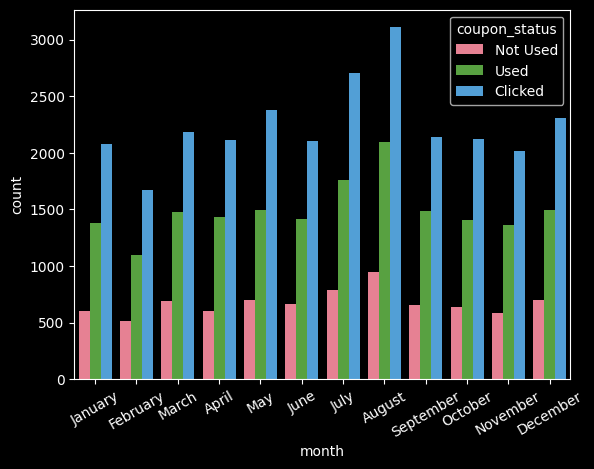

In [967]:
sns.barplot(monthly_coupons , x = 'month' , y = 'count' , hue = 'coupon_status')
plt.xticks(rotation = 30)
plt.show()

In [968]:
cgdf = purchases.groupby('coupon_status').agg({'revenue':'sum'})
cgdf

,revenue
coupon_status,
Clicked,2377266.65
Not Used,732709.87
Used,1560818.10


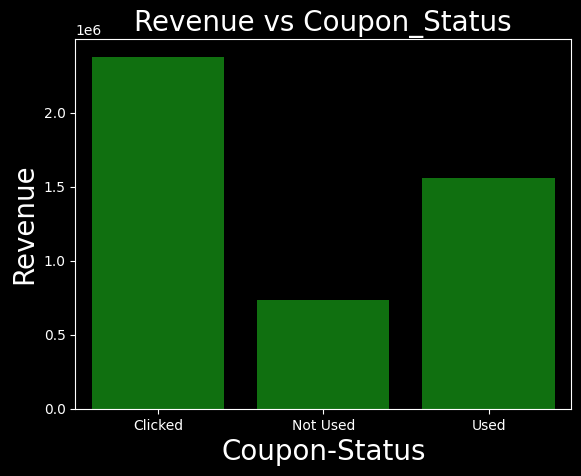

In [969]:
sns.barplot(cgdf , x = 'coupon_status' , y = 'revenue' , color = 'green')
plt.title('Revenue vs Coupon_Status' , fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
plt.xlabel('Coupon-Status' , fontsize = 20)
plt.savefig('./images/q6.png')

### **Logic Used:**

- Group Transactions by coupon status.
- Aggregate based on revenue.

---

### 📊 Observations:

**_"Clicked" Generates the Highest Revenue:_**

- The "Clicked" category contributes the most to overall revenue, exceeding ₹2.3 million.

* This implies that users who interacted with the coupon (e.g. clicked on it) but did not necessarily redeem it still made substantial purchases.

**_"Used" Performs Well but Not the Highest:_**

- The "Used" coupon category contributes around ₹1.55 million in revenue.

- This confirms that coupon redemption does help drive revenue but doesn’t outperform the "Clicked" group.

**_"Not Used" Lags Behind:_**

- The "Not Used" category contributes the least, under ₹750,000.

- Customers who didn’t engage with coupons at all generated significantly less revenue.

---

### 🧠 Interpretation & Strategy Recommendations:

**_Engagement Triggers Revenue:_**

- Simply exposing users to coupons (clicks) appears to influence purchasing behavior positively, even without redemption.

- Optimize placement and visibility of coupons to increase clicks — e.g., homepage banners, cart page offers.

**_Optimize Redemption Strategy:_**

- Since “Used” also brings strong revenue, offer time-limited or personalized coupons to push users from "Clicked" to "Used".

- Add nudges like "You’ve unlocked a 10% discount! Apply now."

**_Educate and Incentivize Non-Users:_**

- Users who didn’t interact with any coupons generated the lowest revenue.

- Target these users with onboarding emails, loyalty programs, or first-order discounts to pull them into the coupon ecosystem.

**_Test Engagement-First Strategies:_**

- A/B test campaigns focused on clicks without heavy discounting, as clicks alone are valuable revenue drivers.


### Q.7 Identify the top-performing products and analyze the factors driving their success.


In [970]:
products = purchases.groupby('product_sku').agg({'revenue':'sum' , 'quantity':'sum', 'product_description':'first', 'avg_price':'first' , 'product_category':'first'}).sort_values(by=['revenue' , 'quantity'] , ascending=False)
products.head()

,revenue,quantity,product_description,avg_price,product_category
product_sku,,,,,
GGOENEBJ079499,688916.34,4570,Nest Learning Thermostat 3rd Gen-USA - Stainle...,153.71,Nest-USA
GGOENEBQ078999,629977.12,5206,Nest Cam Outdoor Security Camera - USA,122.77,Nest-USA
GGOENEBB078899,528612.93,4402,Nest Cam Indoor Security Camera - USA,122.77,Nest-USA
GGOENEBQ079099,213819.16,2683,Nest Protect Smoke + CO White Battery Alarm-USA,81.50,Nest-USA
GGOENEBQ079199,212495.57,2670,Nest Protect Smoke + CO White Wired Alarm-USA,81.50,Nest-USA


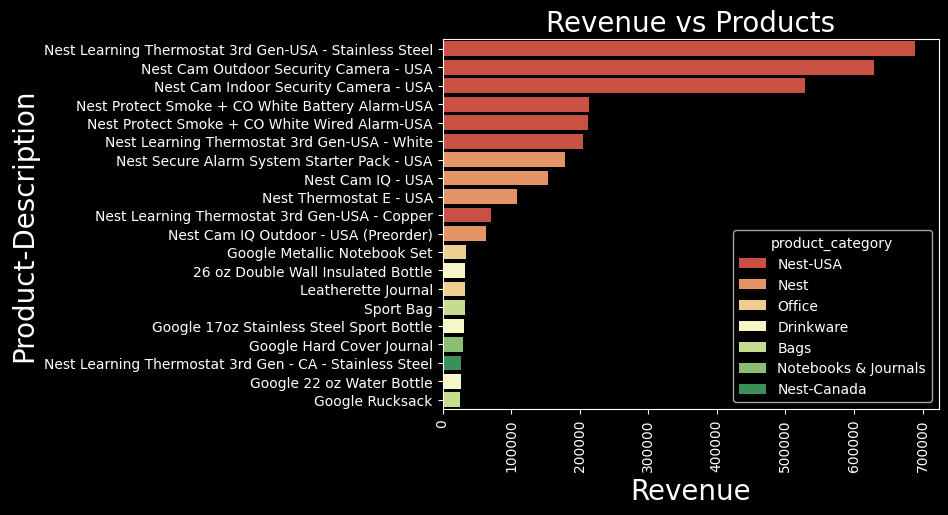

In [971]:
# plt.figure(figsize = (15,10))
sns.barplot(products.head(20) , x = 'revenue' , y = 'product_description' , hue = 'product_category' , palette= 'RdYlGn')
plt.xticks(rotation = 90)
plt.xlabel('Revenue' , fontsize = 20)
plt.ylabel('Product-Description' , fontsize = 20)
plt.title('Revenue vs Products' , fontsize = 20)
plt.savefig('./images/q7.png')
plt.show()

### **Logic Used:**

- Group by products.
- Sort in descending manner and display results.

---

### **_The chart above shows the top 10 products by total revenue. Key findings and their implications are:_**

### **_🔝 Top Products by Revenue:_**

- Nest Learning Thermostat 3rd Gen - Stainless Steel

- Nest Cam Outdoor Security Camera

- Nest Cam Indoor Security Camera

- Nest Protect Smoke + CO Alarms (Battery & Wired)

- Nest Secure Alarm System Starter Pack

These products combine high selling price with strong volume demand, making them revenue powerhouses.

---

### **_🔍 Success Factors:_**

- Brand Recognition: Popular Nest-branded products (thermostats, cameras) dominate the list due to trust, quality, and integrated smart home features.

- High Average Unit Price: Products like thermostats and cameras have high price points, increasing per-sale revenue.

- Functional Value & Demand: Security and smart home automation are high-priority categories for customers.

- Cross-Selling Opportunities: These products often complement each other (e.g., thermostat + camera), suggesting bundling may be driving multiple-item purchases.

- Seasonality or Promotions: Some items may have benefited from discounts or marketing pushes (e.g., smart devices in winter or sale seasons).

---

### **_🏪 Inventory Management Recommendations:_**

- Prioritize Stocking: Ensure consistent inventory for the top-selling SKUs to avoid stockouts, especially during peak months.

- Safety Stock Strategy: Maintain buffer stock for high-demand items like thermostats and cameras, using historical monthly sales data.

- Lead Time Optimization: For top sellers, reduce lead time by sourcing them in advance or from faster suppliers.

---

### **_💡 Promotional Strategy Recommendations:_**

- Focus Campaigns on Top SKUs: Allocate more budget to products with high revenue contribution, especially during seasonal demand spikes.

- Bundle Offers: Combine top products (e.g., thermostat + camera) into discounted packages to increase average order value.

- Loyalty Points & Coupons: Incentivize repeat purchases on these categories with loyalty programs or tiered discounts.

- Personalized Marketing: Use customer purchase history to recommend related high-performing products.


### Q.8 Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?


In [972]:
monthly_revenue

,month,revenue,mnum
4,January,403624.58,1
3,February,310819.80,2
7,March,349608.09,3
0,April,401618.42,4
8,May,307763.42,5
6,June,321081.38,6
5,July,372638.07,7
1,August,401210.37,8
11,September,360548.40,9
10,October,409681.28,10


In [973]:
marketing = pd.read_csv('./data/Marketing_Spend.csv')
marketing.columns = [str.lower(column) for column in marketing.columns]
marketing['date'] = pd.to_datetime(marketing.date)
marketing['month'] = marketing['date'].dt.month_name()
marketing['mnum'] = marketing['date'].dt.month
marketing['spend'] = marketing['online_spend'] + marketing['offline_spend']
marketing.head()

,date,offline_spend,online_spend,month,mnum,spend
0,2019-01-01,4500,2424.50,January,1,6924.50
1,2019-01-02,4500,3480.36,January,1,7980.36
2,2019-01-03,4500,1576.38,January,1,6076.38
3,2019-01-04,4500,2928.55,January,1,7428.55
4,2019-01-05,4500,4055.30,January,1,8555.30


In [974]:
monthly_marketing = marketing.groupby('month').agg({'spend':'sum'}).reset_index()
monthly_marketing

,month,spend
0,April,157026.83
1,August,142904.15
2,December,198648.75
3,February,137107.92
4,January,154928.95
5,July,120217.85
6,June,134318.14
7,March,122250.09
8,May,118259.64
9,November,161144.96


In [975]:
mdf = pd.merge(monthly_revenue , monthly_marketing , on = 'month')
mdf

,month,revenue,mnum,spend
0,January,403624.58,1,154928.95
1,February,310819.80,2,137107.92
2,March,349608.09,3,122250.09
3,April,401618.42,4,157026.83
4,May,307763.42,5,118259.64
5,June,321081.38,6,134318.14
6,July,372638.07,7,120217.85
7,August,401210.37,8,142904.15
8,September,360548.40,9,135514.54
9,October,409681.28,10,151224.65


In [976]:
mdf['roi%'] = ((mdf['revenue'] - mdf['spend']) / mdf['spend'] * 100).round(3)
mdf

,month,revenue,mnum,spend,roi%
0,January,403624.58,1,154928.95,160.522
1,February,310819.80,2,137107.92,126.697
2,March,349608.09,3,122250.09,185.978
3,April,401618.42,4,157026.83,155.764
4,May,307763.42,5,118259.64,160.244
5,June,321081.38,6,134318.14,139.045
6,July,372638.07,7,120217.85,209.969
7,August,401210.37,8,142904.15,180.755
8,September,360548.40,9,135514.54,166.059
9,October,409681.28,10,151224.65,170.909


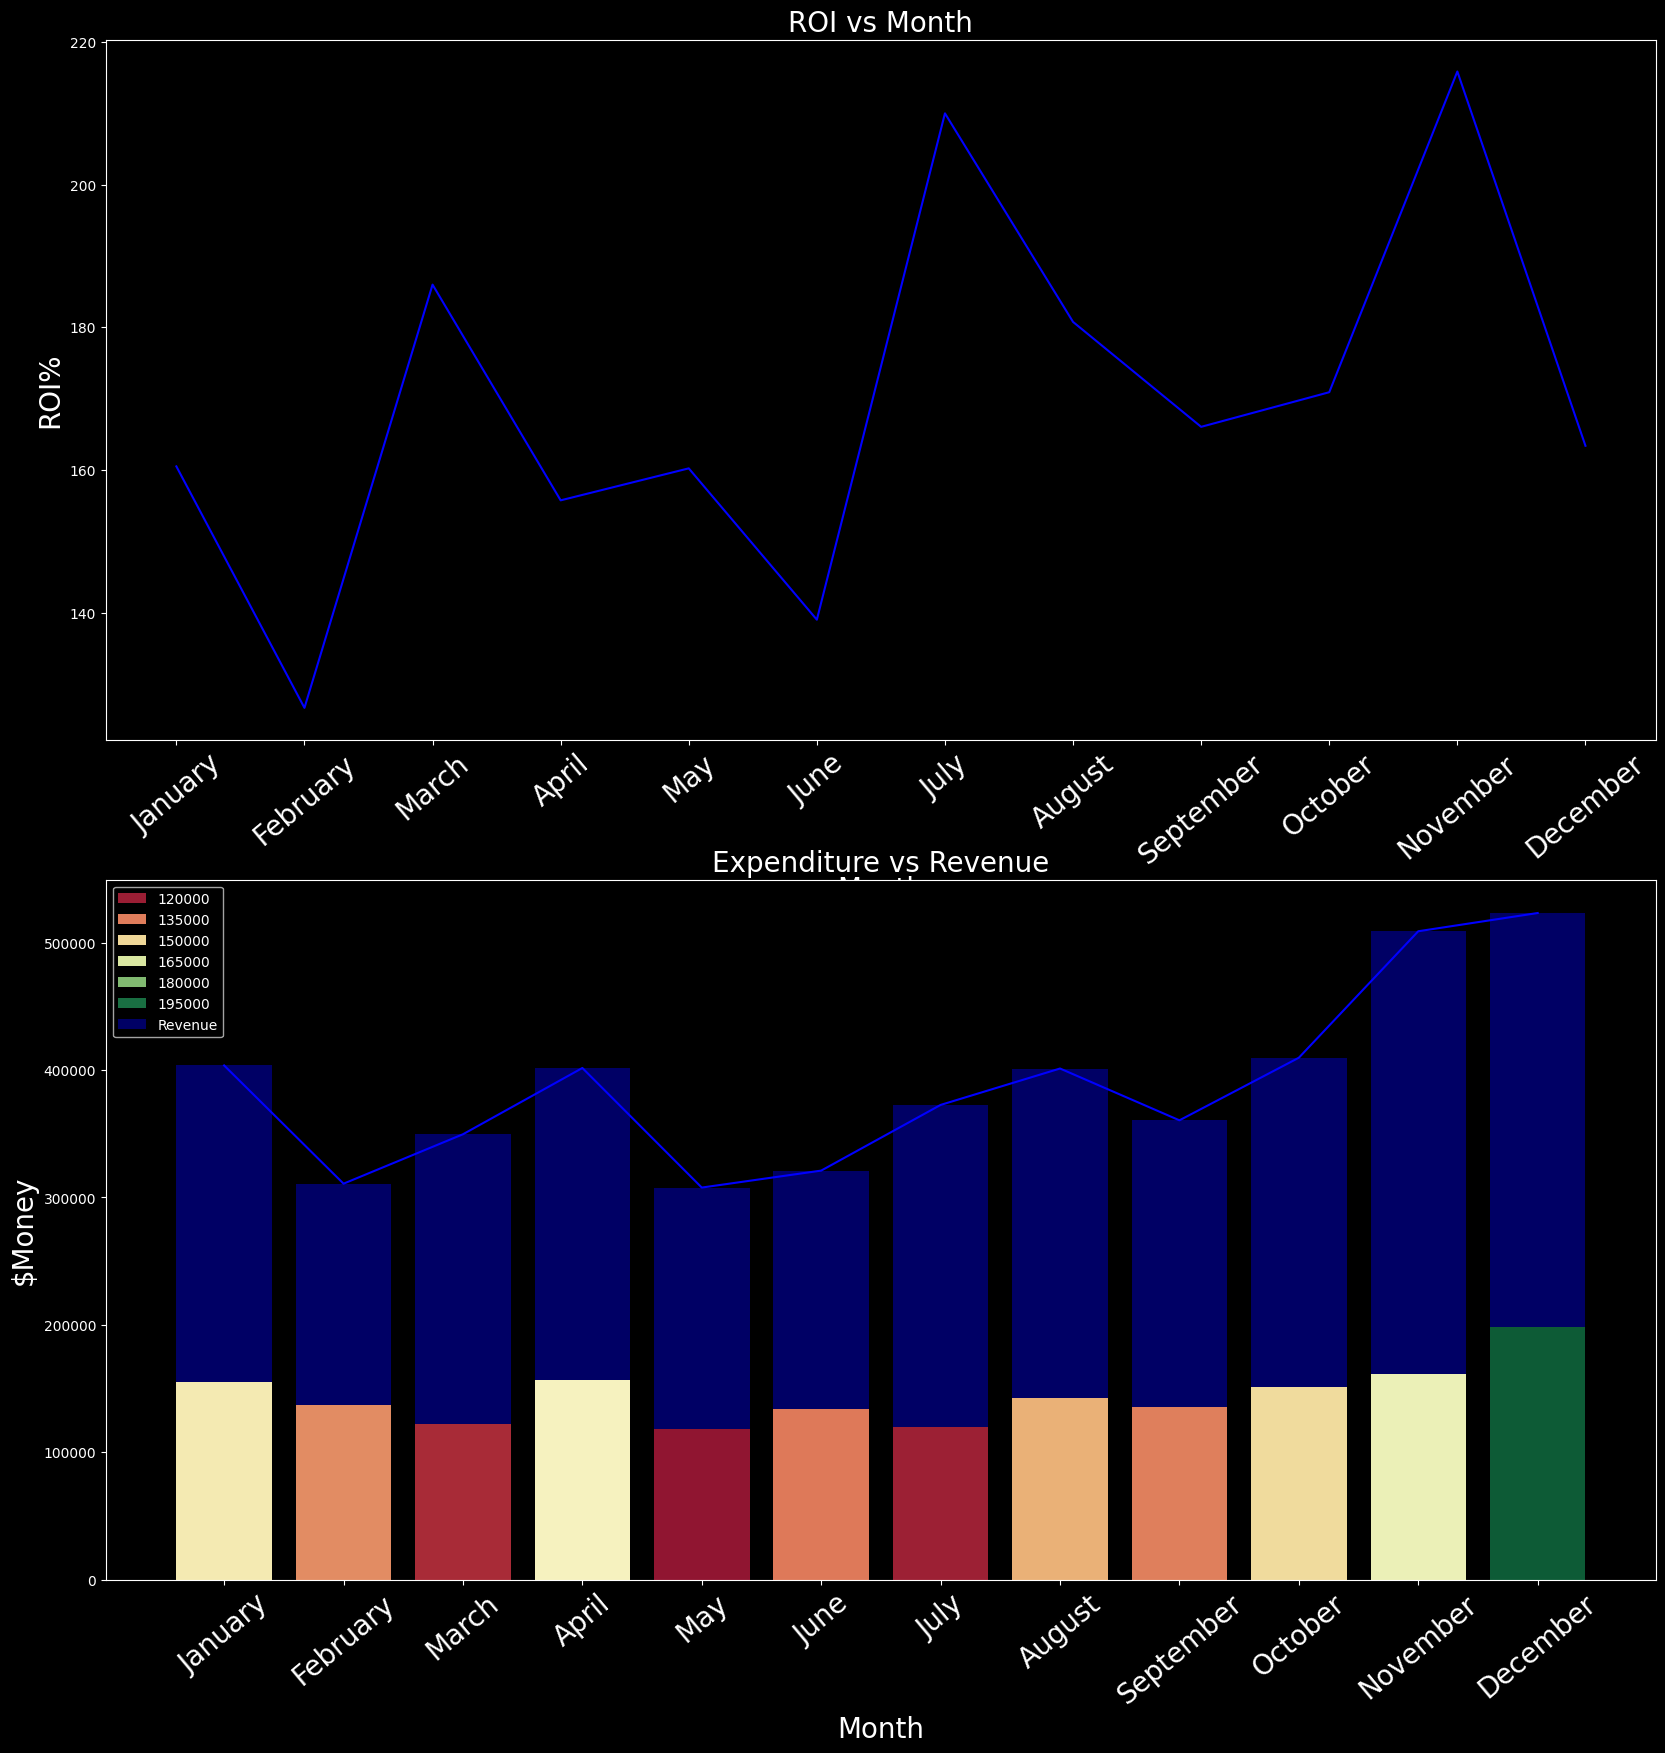

In [977]:
fig , axes = plt.subplots(2,1  , figsize = (20,20))
plt.sca(axes[0])
sns.lineplot(mdf , x = 'month' , y = 'roi%')
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('ROI%' , fontsize = 20)
plt.title('ROI vs Month' , fontsize = 20)
plt.xticks(rotation = 40 , fontsize = 20)


plt.sca(axes[1])
plt.bar( mdf['month'] , mdf['revenue'] , alpha= 0.4 , label = 'Revenue')
sns.barplot(mdf , x = 'month' , y = 'spend' , hue = 'spend' , palette= 'RdYlGn')
plt.xticks(rotation = 40 , fontsize = 20)
sns.lineplot(mdf , x = 'month' , y = 'revenue' )
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('$Money' , fontsize = 20)
plt.title('Expenditure vs Revenue' , fontsize = 20)
plt.legend()
plt.savefig('./images/q8.png')
plt.show()

In [978]:
print(f"Correlation b/w monthly revenue and marketing_expenditure: {mdf['revenue'].corr(mdf['spend'])}")

Correlation b/w monthly revenue and marketing_expenditure: 0.8515025229141345


### **Logic Used:**

- Groupby month and aggregate over revenue and marketing spend from transactions and marketing data respectively.

---

### 📊 Marketing Spend vs Revenue Analysis (2019)

### 🔍 Key Observations:

#### Disproportionately High ROI Months:

- July and November stand out with the highest ROI, exceeding 3.0.

- Indicates efficient marketing: modest spend produced high revenue.

- Likely boosted by seasonal campaigns or strong-performing product sales.

#### Disproportionately Low ROI Months:

- February and June show low ROI (near 2.3–2.4).

- These months had comparatively higher spend with lower revenue returns, signaling inefficiency or poor campaign targeting.

- Spending vs Revenue Correlation:

- While total revenue does trend upwards with marketing spend, increased spend doesn't always equate to better returns.

- ROI plateaus or declines when spend increases without strategic optimization.

---

#### 📈 Recommendations to Improve Marketing ROI:

1. Double Down on High-ROI Months:

   - Scale up spend during months like July and November, focusing on already successful channels or campaigns.

   Refine Campaigns in Low-ROI Periods:

   - Audit February and June efforts: was the messaging, targeting, or product offering misaligned?

   - A/B test alternate creatives or shift channel emphasis.

2. Dynamic Budgeting:

   - Move away from flat monthly budgets — allocate based on past ROI trends, forecasted seasonality, and expected product launches.

   Shift Toward Performance Channels:

   - Increase investment in digital channels that allow better tracking and targeting (e.g., Google Ads, social retargeting).

3. Run Attribution Modeling:

   - Identify which channels drive assisted conversions and optimize cross-channel synergy.

4. Tie Marketing to Product Strategy:

   - Promote high-margin or top-performing products during low-ROI months to lift returns without increasing spend.


### Q.9 Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?


In [979]:
gdf = marketing.groupby('month').agg({'offline_spend':'sum' , 'online_spend':'sum'})
mdf = pd.merge(monthly_revenue , gdf , on = 'month')
mdf

,month,revenue,mnum,offline_spend,online_spend
0,January,403624.58,1,96600,58328.95
1,February,310819.80,2,81300,55807.92
2,March,349608.09,3,73500,48750.09
3,April,401618.42,4,96000,61026.83
4,May,307763.42,5,65500,52759.64
5,June,321081.38,6,80500,53818.14
6,July,372638.07,7,67500,52717.85
7,August,401210.37,8,85500,57404.15
8,September,360548.40,9,83000,52514.54
9,October,409681.28,10,93500,57724.65


In [980]:
mdf['eoffline'] = mdf['revenue']/mdf['offline_spend']
mdf['eonline'] = mdf['revenue']/mdf['online_spend']
mdf

,month,revenue,mnum,offline_spend,online_spend,eoffline,eonline
0,January,403624.58,1,96600,58328.95,4.178308,6.919798
1,February,310819.80,2,81300,55807.92,3.823122,5.569457
2,March,349608.09,3,73500,48750.09,4.756573,7.171435
3,April,401618.42,4,96000,61026.83,4.183525,6.581014
4,May,307763.42,5,65500,52759.64,4.698678,5.833312
5,June,321081.38,6,80500,53818.14,3.988589,5.966044
6,July,372638.07,7,67500,52717.85,5.520564,7.068537
7,August,401210.37,8,85500,57404.15,4.692519,6.989222
8,September,360548.40,9,83000,52514.54,4.343957,6.865687
9,October,409681.28,10,93500,57724.65,4.381618,7.097164


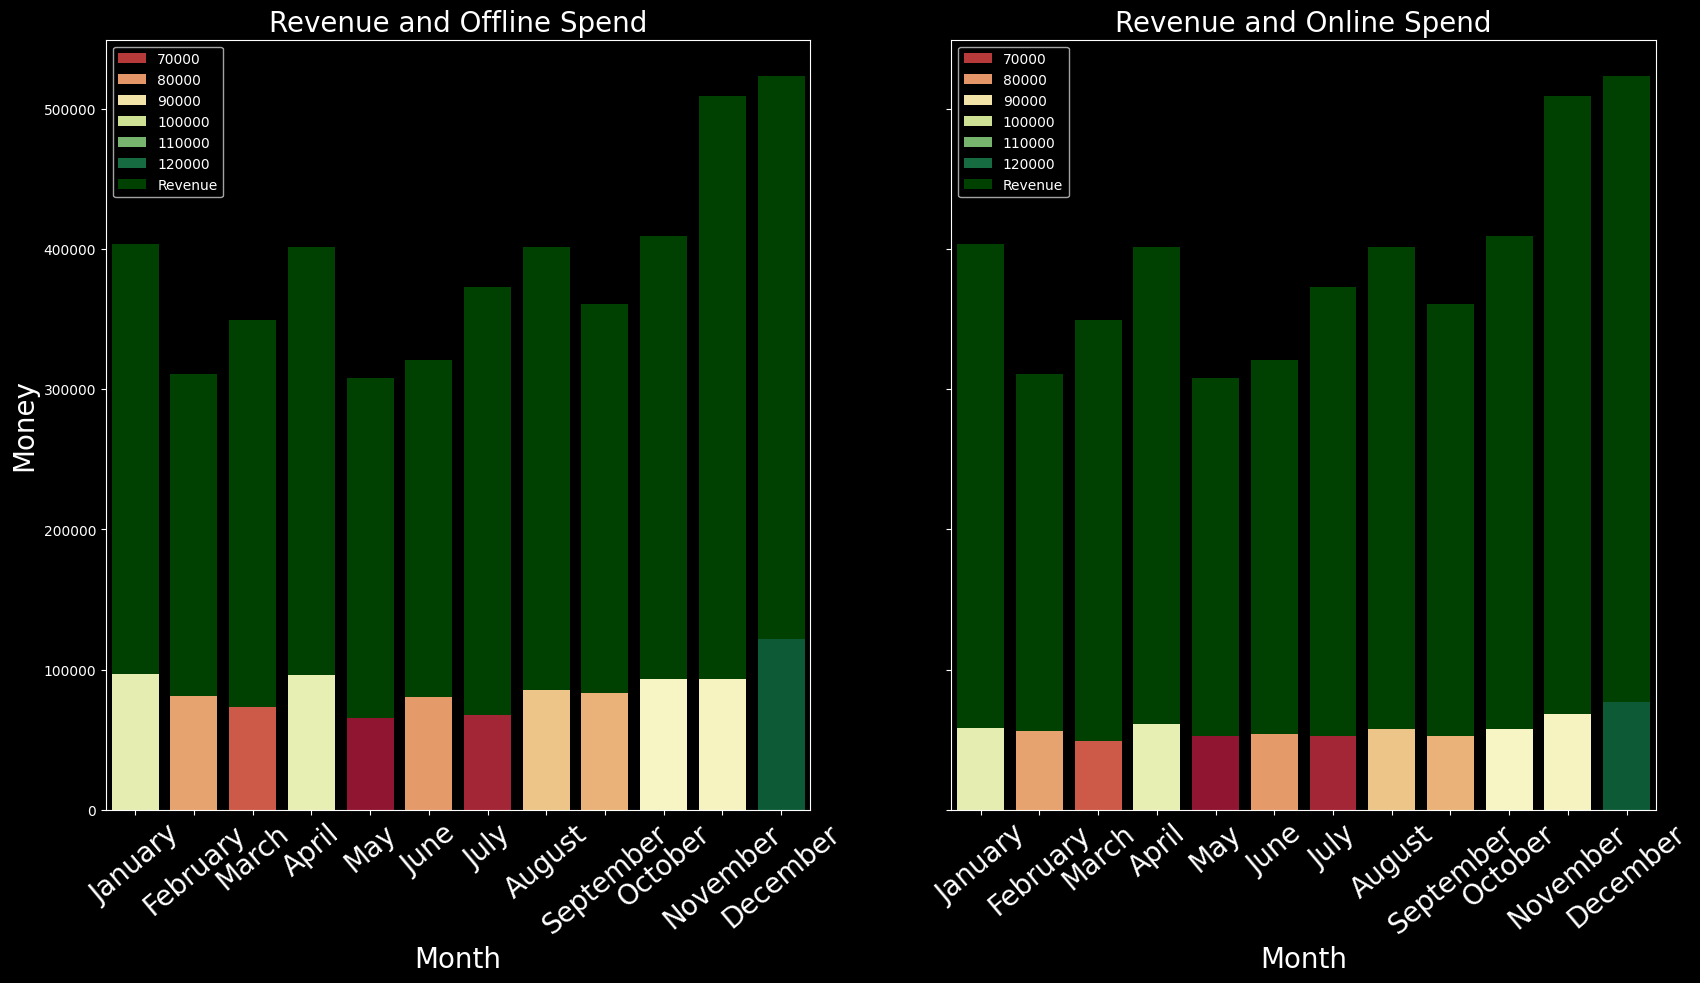

In [981]:
figure , axes = plt.subplots(1,2 , figsize = (20,10) , sharey = True)

plt.sca(axes[0])
plt.title('Revenue and Offline Spend' , fontsize = 20)
plt.bar(mdf['month'] , mdf['revenue'] , alpha = 0.5 , color = 'green' , label = 'Revenue')
sns.barplot(mdf , x = 'month' , y = 'offline_spend' , hue = 'offline_spend' , palette = 'RdYlGn')
plt.ylabel('Money' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
plt.legend()
plt.xticks(rotation = 40 , fontsize = 20)

plt.sca(axes[1])
plt.title('Revenue and Online Spend' , fontsize = 20)
plt.bar(mdf['month'] , mdf['revenue'] , alpha = 0.5 , color = 'green' , label = 'Revenue')
sns.barplot(mdf , x = 'month' , y = 'online_spend' , hue = 'offline_spend' , palette = 'RdYlGn')
plt.xlabel('Month' , fontsize = 20)
plt.legend()
plt.xticks(rotation = 40, fontsize = 20)
plt.savefig('./images/q9.1.png')
plt.show()

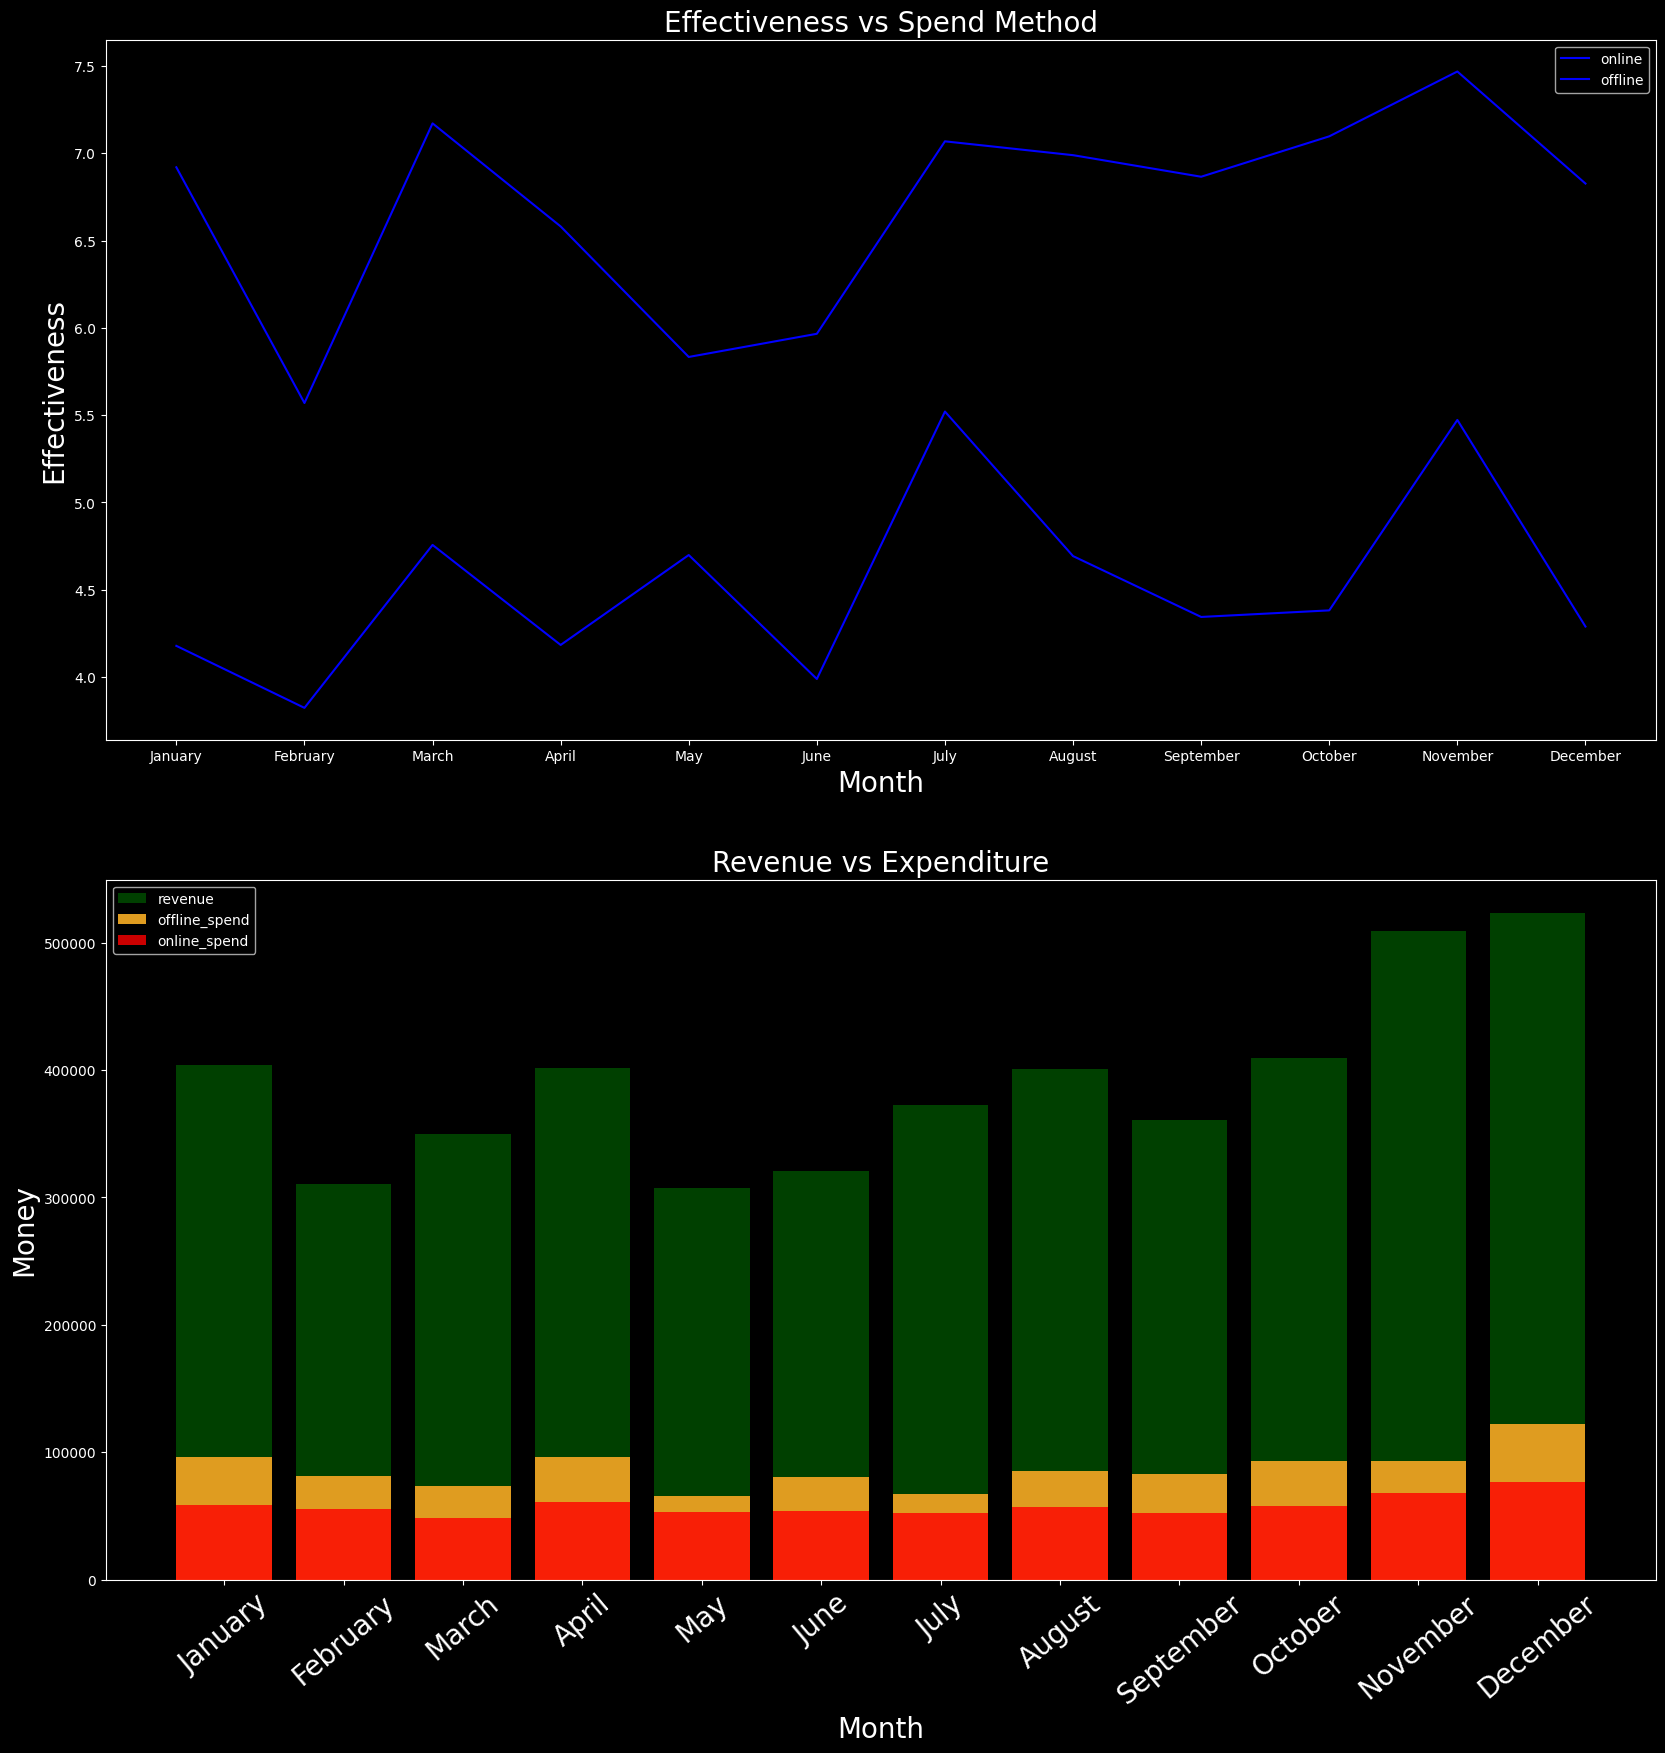

In [982]:
fig , axes = plt.subplots(2 ,1 , figsize = (20,20))

plt.sca(axes[0])
sns.lineplot(mdf , x = 'month' , y = 'eonline' , label = 'online')
sns.lineplot(mdf , x = 'month' , y = 'eoffline' , label = 'offline')
plt.title('Effectiveness vs Spend Method' , fontsize = 20)
plt.ylabel('Effectiveness' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
plt.legend()

plt.sca(axes[1])
plt.bar(mdf['month'] , mdf['revenue'] , alpha = 0.5, color = 'green' , label = 'revenue')
sns.barplot(mdf , x = 'month' , y = 'offline_spend' , label = 'offline_spend' , color = 'orange')
plt.bar(mdf['month'] , mdf['online_spend'] , alpha = 0.8 , color = 'red', label = 'online_spend')
plt.xlabel('Month' , fontsize = 20)
plt.title('Revenue vs Expenditure' , fontsize = 20)
plt.legend()
plt.xticks(rotation = 40 , fontsize = 20)
plt.ylabel('Money' , fontsize = 20)
plt.savefig('./images/q9.2.png')
plt.show()

### 📈 Effectiveness of Marketing Campaigns by Channel (Revenue per ₹1 Spent)

### **🔍 Key Insights from the Chart:**

#### Online Marketing Performs Better:

- Across all months, online channels consistently yield higher revenue per rupee spent than offline.

- Peaks are visible in March, July, and November, suggesting these months had particularly successful digital campaigns.

- Offline Marketing Yields Lower Returns:

- The offline spend effectiveness remains relatively flat and consistently underperforms online spend.

- Lowest performance is observed in February and June, indicating poor campaign effectiveness during those periods.

---

### **_💡Strategic Recommendations:_**

#### Reallocate Budget Toward Online Channels:

- Given its consistently higher ROI, consider increasing online marketing spend by reducing allocation to offline campaigns.

#### Investigate Underperforming Months:

- Months like February and June had low offline and online effectiveness.

- Analyze campaign messaging, audience targeting, or external factors like seasonality.

#### Focus Online Spend on Peak Months:

- March, July, and November yielded top online effectiveness — replicate and expand those campaigns.

- Consider pre-launch buzz and retargeting to further enhance performance.

#### Refine Offline Marketing Tactics:

- If offline remains essential (e.g., branding), switch to performance-driven offline tactics like QR-based tracking or store-visit coupons.

#### Channel Attribution Modeling:

- Understand how channels interact in multi-touch journeys. Online may assist offline (or vice versa), so insights should drive cross-channel synergy.

#### Run Controlled Budget Experiments:

- A/B test budget splits (e.g., 70/30 vs. 50/50 online/offline) and measure which mix gives the highest return per campaign type.


### Q.10 Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)


In [983]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [984]:
customers = pd.read_excel('./data/CustomersData.xlsx')
customers.columns = [str.lower(column) for column in customers.columns]
customers.head()

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [985]:
mdf = pd.merge(purchases[['transaction_date', 'transaction_id' , 'revenue' , 'customerid']] , customers , on = 'customerid' , how = 'right')
mdf.head()

,transaction_date,transaction_id,revenue,customerid,gender,location,tenure_months
0,2019-01-01,16679,153.71,17850,M,Chicago,12
1,2019-01-01,16680,153.71,17850,M,Chicago,12
2,2019-01-01,16681,2.05,17850,M,Chicago,12
3,2019-01-01,16682,87.65,17850,M,Chicago,12
4,2019-01-01,16682,16.50,17850,M,Chicago,12


In [986]:
reference_date = purchases['transaction_date'].max()
rfm = mdf.groupby('customerid').agg({'transaction_date': lambda x : (reference_date - x.max()).days ,
                               'transaction_id':'count' , 'revenue': 'sum' }).reset_index()

rfm.columns = ['customerid' , 'recency' , 'frequency' , 'monetary']
rfm

,customerid,recency,frequency,monetary
0,12346,107,2,30.99
1,12347,59,60,13834.90
2,12348,73,23,1442.12
3,12350,17,17,1360.07
4,12356,107,36,1442.47
...,...,...,...,...
1463,18259,270,7,544.34
1464,18260,87,40,2363.05
1465,18269,194,8,101.56
1466,18277,69,1,298.00


In [987]:
rfm['r'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['f'] = pd.qcut(rfm['frequency'].rank(method = 'first') , 4 , labels = [4,3,2,1]).astype(int)
rfm['m'] = pd.qcut(rfm['monetary'].rank(method = 'first'), 4 , labels = [4,3,2,1]).astype(int)
rfm['score'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)
rfm
rfm

,customerid,recency,frequency,monetary,r,f,m,score
0,12346,107,2,30.99,3,4,4,344
1,12347,59,60,13834.90,3,1,1,311
2,12348,73,23,1442.12,3,2,3,323
3,12350,17,17,1360.07,4,3,3,433
4,12356,107,36,1442.47,3,2,3,323
...,...,...,...,...,...,...,...,...
1463,18259,270,7,544.34,1,4,4,144
1464,18260,87,40,2363.05,3,2,2,322
1465,18269,194,8,101.56,2,4,4,244
1466,18277,69,1,298.00,3,4,4,344


In [988]:
rfm['score'] = rfm[['r','f','m']].apply(lambda x: int(str(x['r']) + str(x['f']) + str(x['m'])) , axis = 1)
rfm

,customerid,recency,frequency,monetary,r,f,m,score
0,12346,107,2,30.99,3,4,4,344
1,12347,59,60,13834.90,3,1,1,311
2,12348,73,23,1442.12,3,2,3,323
3,12350,17,17,1360.07,4,3,3,433
4,12356,107,36,1442.47,3,2,3,323
...,...,...,...,...,...,...,...,...
1463,18259,270,7,544.34,1,4,4,144
1464,18260,87,40,2363.05,3,2,2,322
1465,18269,194,8,101.56,2,4,4,244
1466,18277,69,1,298.00,3,4,4,344


In [1021]:
def rfm_segment(row):
    r, f, m = row['r'], row['f'], row['m']
    
    # Strict Premium: top recency, frequency, and high monetary
    if r == 4 and f == 4 and m == 4:
        return 'Premium'
    
    # Gold: high recency and frequency, at least decent monetary
    elif (r >= 3 and f >= 3 and m >= 2):
        return 'Gold'
    
    # Silver: recent and moderately active, or high monetary but low recency
    elif (r >= 2 and (f >= 2 or m >= 2)):
        return 'Silver'
    
    # Standard: everyone else
    else:
        return 'Standard'
    
rfm['segment'] = rfm.apply(rfm_segment, axis = 1)
rfm

,customerid,recency,frequency,monetary,r,f,m,score,segment
0,12346,107,2,30.99,3,4,4,344,Gold
1,12347,59,60,13834.90,3,1,1,311,Standard
2,12348,73,23,1442.12,3,2,3,323,Silver
3,12350,17,17,1360.07,4,3,3,433,Gold
4,12356,107,36,1442.47,3,2,3,323,Silver
...,...,...,...,...,...,...,...,...,...
1463,18259,270,7,544.34,1,4,4,144,Standard
1464,18260,87,40,2363.05,3,2,2,322,Silver
1465,18269,194,8,101.56,2,4,4,244,Silver
1466,18277,69,1,298.00,3,4,4,344,Gold


In [1022]:
segment_counts = rfm['segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer_Count']
print(segment_counts)

segment_stats = rfm.groupby('segment').agg({
    'recency': 'max',
    'frequency': 'min',
    'monetary': 'sum',
    'customerid': 'count'
}).rename(columns={'customerid': 'Customer_Count'}).reset_index()

print(segment_stats)


    Segment  Customer_Count
0  Standard             622
1    Silver             550
2      Gold             264
3   Premium              32
    segment  recency  frequency    monetary  Customer_Count
0      Gold      131          1   282152.85             264
1   Premium       49          1     9574.05              32
2    Silver      220          1  1129541.81             550
3  Standard      364          1  3249525.91             622


In [1023]:
segments = rfm.groupby('segment').agg({'monetary':'sum' , 'frequency':'mean', 'recency':'max'}).rename(columns = {'recency':'least-recent'}).round(3)
segments

,monetary,frequency,least-recent
segment,,,
Gold,282152.85,11.231,131
Premium,9574.05,4.250,49
Silver,1129541.81,25.731,220
Standard,3249525.91,57.349,364


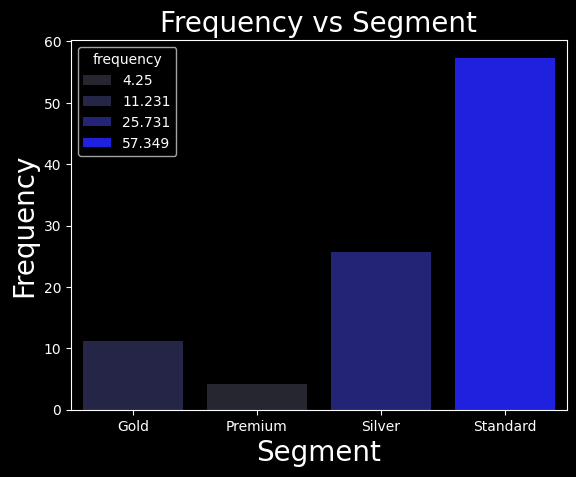

In [1024]:
sns.barplot(segments, x = 'segment' , y = 'frequency' , hue = 'frequency', color='blue')
plt.xlabel('Segment' , fontsize = 20)
plt.ylabel('Frequency' , fontsize = 20)
plt.title('Frequency vs Segment' , fontsize = 20)
plt.savefig('./images/q10.1.png')
plt.show()

In [1025]:
# get retained customers
first_transactions = purchases.groupby('customerid').agg({'transaction_date':'first'}).reset_index().rename(columns={'transaction_date':'first_transaction'})
recent_transactions = purchases.groupby('customerid').agg({'transaction_date':'last'}).reset_index().rename(columns={'transaction_date':'last_transaction'})
retentions = recent_transactions.merge(first_transactions , on = 'customerid')
retentions

,customerid,last_transaction,first_transaction
0,12346,2019-09-15,2019-09-15
1,12347,2019-11-02,2019-03-24
2,12348,2019-10-19,2019-06-22
3,12350,2019-12-14,2019-12-14
4,12356,2019-09-15,2019-09-15
...,...,...,...
1463,18259,2019-04-05,2019-04-05
1464,18260,2019-10-05,2019-06-22
1465,18269,2019-06-20,2019-04-05
1466,18277,2019-10-23,2019-10-23


In [1026]:
retentions['retained'] = retentions.apply(lambda x : x['first_transaction'] != x['last_transaction'], axis = 1)
retentions

,customerid,last_transaction,first_transaction,retained
0,12346,2019-09-15,2019-09-15,False
1,12347,2019-11-02,2019-03-24,True
2,12348,2019-10-19,2019-06-22,True
3,12350,2019-12-14,2019-12-14,False
4,12356,2019-09-15,2019-09-15,False
...,...,...,...,...
1463,18259,2019-04-05,2019-04-05,False
1464,18260,2019-10-05,2019-06-22,True
1465,18269,2019-06-20,2019-04-05,True
1466,18277,2019-10-23,2019-10-23,False


In [1027]:
rretentions = rfm.merge(retentions , on= 'customerid')
rretentions

,customerid,recency,frequency,monetary,r,f,m,score,segment,last_transaction,first_transaction,retained
0,12346,107,2,30.99,3,4,4,344,Gold,2019-09-15,2019-09-15,False
1,12347,59,60,13834.90,3,1,1,311,Standard,2019-11-02,2019-03-24,True
2,12348,73,23,1442.12,3,2,3,323,Silver,2019-10-19,2019-06-22,True
3,12350,17,17,1360.07,4,3,3,433,Gold,2019-12-14,2019-12-14,False
4,12356,107,36,1442.47,3,2,3,323,Silver,2019-09-15,2019-09-15,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,270,7,544.34,1,4,4,144,Standard,2019-04-05,2019-04-05,False
1464,18260,87,40,2363.05,3,2,2,322,Silver,2019-10-05,2019-06-22,True
1465,18269,194,8,101.56,2,4,4,244,Silver,2019-06-20,2019-04-05,True
1466,18277,69,1,298.00,3,4,4,344,Gold,2019-10-23,2019-10-23,False


In [1028]:
segments = rretentions.groupby('segment').agg({'monetary':'sum' , 'frequency':'count', 'recency':'max', 'retained':'sum'})
segments

,monetary,frequency,recency,retained
segment,,,,
Gold,282152.85,264,131,100
Premium,9574.05,32,49,5
Silver,1129541.81,550,220,297
Standard,3249525.91,622,364,332


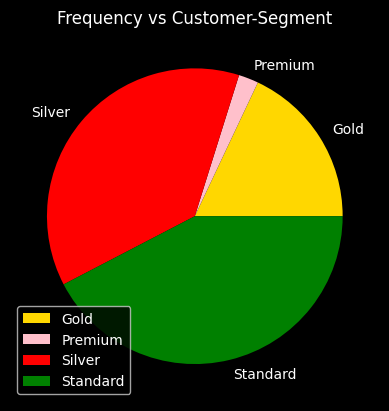

In [1029]:
plt.title('Frequency vs Customer-Segment')
plt.pie(segments['frequency'] , labels = segments.index ,  colors=['gold', 'pink', 'red', 'green'])
plt.legend()
plt.savefig('./images/q10.2.png')
plt.show()

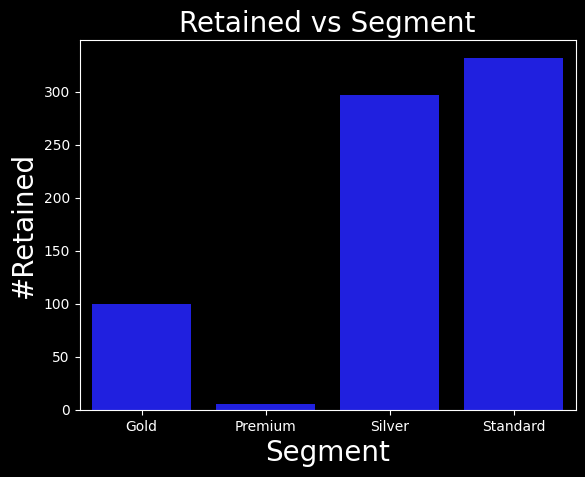

In [1030]:
sns.barplot(segments , x = 'segment' , y = 'retained')
plt.xlabel('Segment' , fontsize = 20)
plt.ylabel('#Retained' , fontsize = 20)
plt.title('Retained vs Segment' , fontsize = 20)
plt.savefig('./images/q10.3.png')
plt.show()

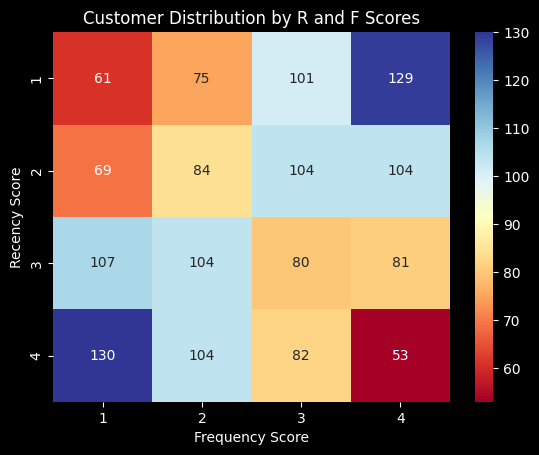

In [1031]:
sns.heatmap(rfm.groupby(['r', 'f']).size().unstack(), cmap="RdYlBu", annot=True, fmt='d')
plt.title("Customer Distribution by R and F Scores")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()

### **Logic Used:**

- Calculate R,F,M metrics for each customer after grouping them from transaction data.
- Segment customers according to a set rule in to different tiers.

---

### 🧠 Strategic Insights & Actions

#### 🔶 Gold Segment

- Insight: High retention, balanced frequency and spending.

- Action:

  - Offer personalized incentives to move them to Premium.

  - Promote upgrade bundles or “VIP status” benefits.

  - Launch loyalty points for frequency boosts.

#### 🟡 Premium Segment

- Insight: Most recent customers, low frequency, but highly loyal.

* Action:

  - Drive repeat purchases with limited-time offers.

  - Introduce early-access or referral programs.

  - Target with upselling campaigns to increase their spend.

#### ⚪ Silver Segment

- Insight: Very frequent, high spend, but poor retention.

- Action:

  - Investigate pain points — post-purchase experience, delivery, or service.

  - Send satisfaction surveys and intervene with support.

  - Offer renewal discounts or loyalty-based tier upgrade plans.

#### ⚫ Standard Segment

- Insight: Oldest customer group, least recent, yet retention is highest — possibly repeat yearly or seasonal buyers.

- Action:

  - Trigger seasonal re-engagement campaigns.

  - Provide anniversary offers based on last purchase.

  - Use reactivation emails or SMS to stay top-of-mind.

---

#### ✅ Recommendation:

- Use this segmentation to:

  - Prioritize retention for Gold and Premium.

  - Re-engage Silver and Standard segments with personalized and


### Q.11 Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?


In [1034]:
segments.reset_index(inplace = True)
segments['revenue%'] = segments['monetary']/np.sum(segments['monetary']) * 100
segments

,index,segment,monetary,frequency,recency,retained,revenue%
0,0,Gold,282152.85,264,131,100,6.040789
1,1,Premium,9574.05,32,49,5,0.204977
2,2,Silver,1129541.81,550,220,297,24.183076
3,3,Standard,3249525.91,622,364,332,69.571158


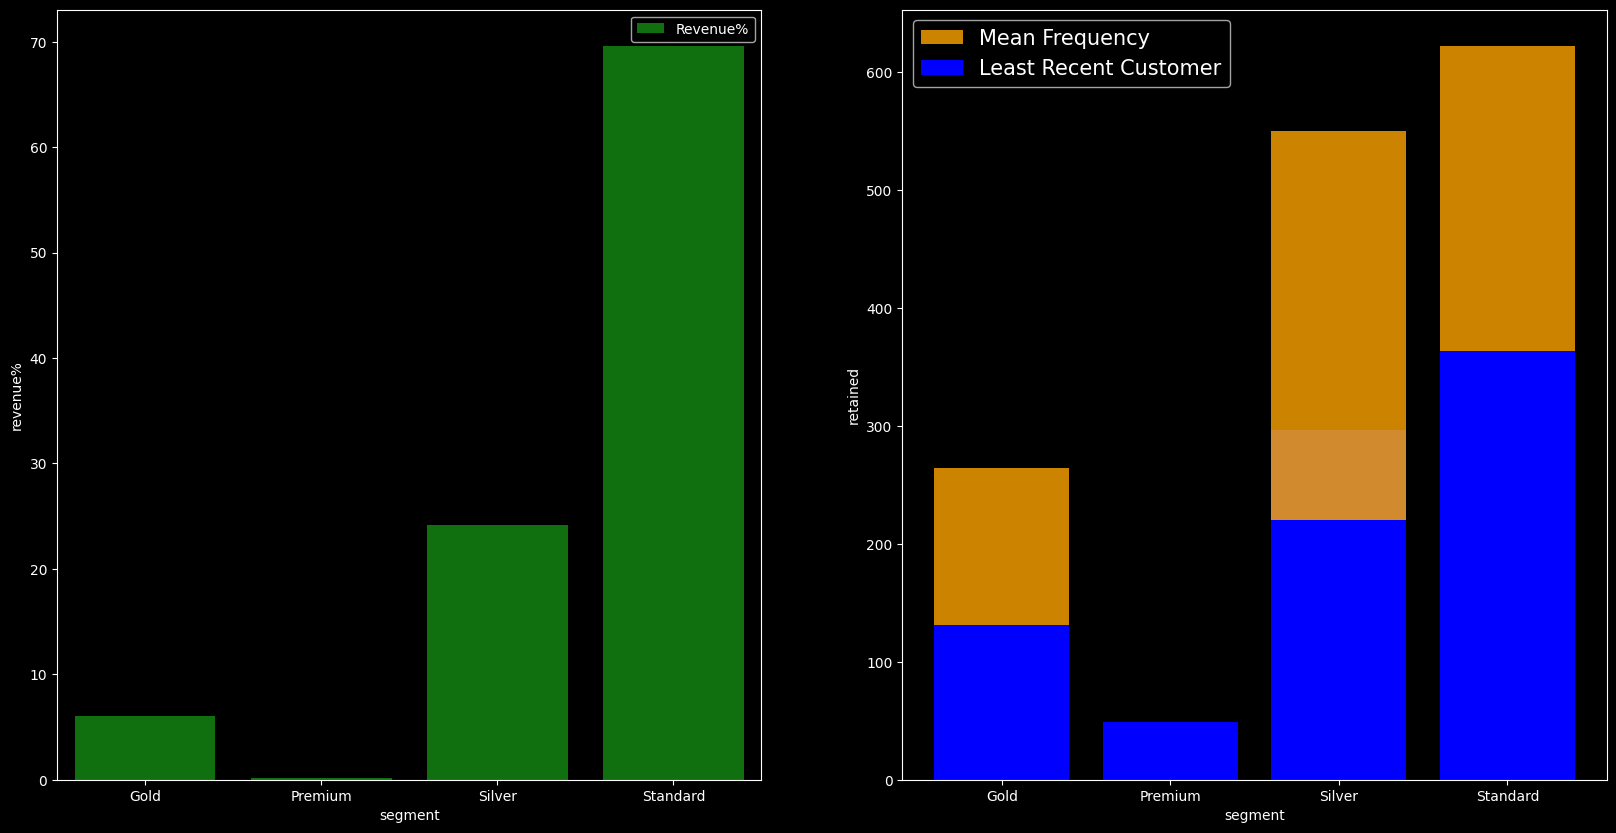

In [1035]:
fig , axes = plt.subplots(1 , 2 , figsize = (20,10))

plt.sca(axes[0])
sns.barplot(segments , x = 'segment' , y = 'revenue%' , label = 'Revenue%' , color = 'green')


plt.sca(axes[1])
sns.barplot(segments , x = 'segment' , y = 'retained')
plt.bar(segments['segment'] , segments['frequency'] , label = 'Mean Frequency' , color = 'orange' , alpha = 0.8)
plt.bar(segments['segment'] , segments['recency'] , label = 'Least Recent Customer')
plt.legend(fontsize = 15)
plt.savefig('./images/q11.png')

### **📊 Final Segment Summary:**

| Segment  | Revenue (₹)   | Revenue % | Frequency | Recency | Retained | Insight                                   |
| -------- | ------------- | --------- | --------- | ------- | -------- | ----------------------------------------- |
| Standard | ₹3,249,525.91 | 69.57%    | 622       | 364     | 332      | Large customer base, low individual value |
| Silver   | ₹1,129,541.81 | 24.18%    | 550       | 220     | 297      | Strong potential, good retention          |
| Gold     | ₹282,152.85   | 6.04%     | 264       | 131     | 100      | High engagement, small volume             |
| Premium  | ₹9,574.05     | 0.20%     | 32        | 49      | 5        | Very weak segment — likely misclassified  |

---

### **🔍 Insights by Segment:**

**🟥 Standard**

Contributes most revenue (69%).

Also has the highest number of retained customers (332).

But: recency = 364 days, i.e., they haven’t purchased in nearly a year.

Likely casual or one-time customers.

**🟦 Silver**

Great balance between retention, frequency, and recency.

Contributes a solid 24% of revenue.

This is your most nurture-ready segment.

**🟨 Gold**

High frequency and decent recency, but low revenue and small count.

This may be an under-promoted loyalist group.

**❌ Premium**

Only 0.2% of revenue with minimal retention or frequency.

---

### **🧠 Strategy Recommendations**

**✅ Standard (Broad Base, Low Depth)**

- Goal: Convert into repeat buyers.

Strategies:

- Post-purchase email automation

- Loyalty points for 2nd+ purchases

- Personalized product recommendations

**✅ Silver (High Potential)**

- Goal: Promote into Gold segment.

Strategies:

- Bundle offers or "Complete the Look"

- Referral bonuses

- Milestone-based rewards

**✅ Gold (Loyal, Low Volume)**

- Goal: Drive monetization through targeted upsell.

Strategies:

- Exclusive early access to new launches

- Limited-time higher-value bundles

- “Spend ₹X, earn Gold+ status” incentives

### **✅ Final Takeaway:**

- Your true value lies in nurturing Silver and converting Standard customers.
- Premium needs strict redefinition, and Gold deserves engagement-based monetization.


### Q12.Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?


In [1002]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [1003]:
tdf = purchases.groupby('customerid').agg({'transaction_date':'first'}).reset_index().rename(columns = {'transaction_date':'first_transaction'})
first_purchases = tdf.merge(purchases, how = 'right' , on = 'customerid')
first_purchases.head()

,customerid,first_transaction,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [1004]:
first_purchases['fmonth'] = first_purchases['first_transaction'].dt.to_period('M')
first_purchases['month'] = first_purchases['transaction_date'].dt.to_period('M')
first_purchases['fmname'] = first_purchases['first_transaction'].dt.month_name()
first_purchases.head()

,customerid,first_transaction,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,fmonth,fmname
0,17850,2019-01-01,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,2019-01,153.71,2019-01,January
1,17850,2019-01-01,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,2019-01,153.71,2019-01,January
2,17850,2019-01-01,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,2019-01,2.05,2019-01,January
3,17850,2019-01-01,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,2019-01,87.65,2019-01,January
4,17850,2019-01-01,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,2019-01,16.50,2019-01,January


In [1005]:
crepeated_purchases = first_purchases[first_purchases['first_transaction'] != first_purchases['transaction_date']]
crepeated_purchases.iloc[3000,:]

customerid                                             12748
first_transaction                        2019-01-08 00:00:00
transaction_id                                         23942
transaction_date                         2019-03-23 00:00:00
product_sku                                   GGOEAFKQ020599
product_description    Android Sticker Sheet Ultra Removable
product_category                                      Office
quantity                                                   1
avg_price                                               2.99
delivery_charges                                         6.5
coupon_status                                       Not Used
mnum                                                       3
month                                                2019-03
revenue                                                 2.99
fmonth                                               2019-01
fmname                                               January
Name: 10606, dtype: obje

[]

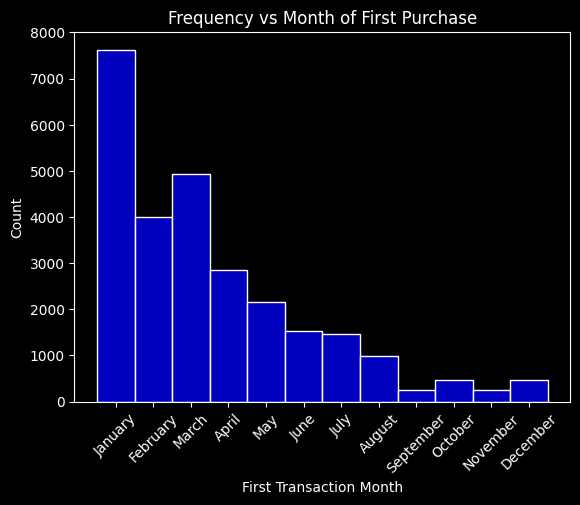

In [1006]:
sns.histplot(crepeated_purchases , x = crepeated_purchases['first_transaction'].dt.month_name() , color = 'blue')
plt.xticks(rotation = 45)
plt.xlabel('First Transaction Month')
plt.title('Frequency vs Month of First Purchase')
plt.savefig('./images/q12.png')
plt.plot()

In [1007]:
gdf = first_purchases.groupby(['fmonth' , 'month']).agg({'customerid':'nunique'}).reset_index()
gdf

,fmonth,month,customerid
0,2019-01,2019-01,215
1,2019-01,2019-02,13
2,2019-01,2019-03,24
3,2019-01,2019-04,34
4,2019-01,2019-05,23
...,...,...,...
73,2019-10,2019-11,6
74,2019-10,2019-12,4
75,2019-11,2019-11,68
76,2019-11,2019-12,7


In [1008]:
rtable = gdf.pivot(index = 'fmonth' , columns = 'month' , values = 'customerid')
rtable

month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
fmonth,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,NaN,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0
2019-03,NaN,NaN,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0
2019-04,NaN,NaN,NaN,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0
2019-05,NaN,NaN,NaN,NaN,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0
2019-06,NaN,NaN,NaN,NaN,NaN,137.0,20.0,22.0,12.0,11.0,14.0,11.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,94.0,13.0,4.0,6.0,11.0,9.0
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,14.0,15.0,10.0,8.0
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,6.0,3.0,2.0


In [1009]:
cohortsize = rtable.to_numpy().diagonal()
# rtable.divide(cohortsize).round(3)
cohortsize
rrates = rtable.divide(cohortsize).round(3)
rrates

month,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
fmonth,,,,,,,,,,,,
2019-01,1.0,0.135,0.136,0.209,0.205,0.321,0.372,0.348,0.295,0.322,0.294,0.321
2019-02,NaN,1.000,0.040,0.055,0.143,0.124,0.234,0.141,0.192,0.138,0.162,0.151
2019-03,NaN,NaN,1.000,0.110,0.312,0.182,0.340,0.244,0.282,0.253,0.221,0.179
2019-04,NaN,NaN,NaN,1.000,0.125,0.175,0.255,0.133,0.192,0.115,0.235,0.113
2019-05,NaN,NaN,NaN,NaN,1.000,0.088,0.096,0.096,0.128,0.149,0.206,0.075
2019-06,NaN,NaN,NaN,NaN,NaN,1.000,0.213,0.163,0.154,0.126,0.206,0.104
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.096,0.051,0.069,0.162,0.085
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.179,0.172,0.147,0.075
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.069,0.044,0.019


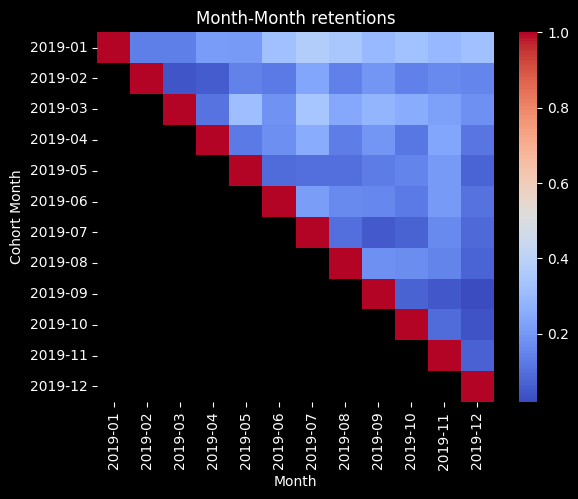

In [1010]:
sns.heatmap(rrates , cmap = 'coolwarm')
plt.xlabel('Month')
plt.ylabel('Cohort Month')
plt.title('Month-Month retentions')
plt.savefig('./images/q12.2.png')

### **Logic Used:**

- Pretty similar to Q4.

* Aggregate based on month of first purchase and not on current month of purchase.

---

#### Insights:

- The retention heatmap reveals which cohorts (grouped by first purchase month) retained customers better.

- A 100% rate might indicate a small cohort where all customers returned at least once, often early in the lifecycle.

#### Strategies to Improve Retention for Weaker Cohorts:

- Targeted Campaigns: Identify weaker cohorts and run personalized re-engagement campaigns.

- Loyalty Programs: Introduce reward systems for frequent buyers.

- Onboarding Experience: Improve first-month experience to build habit-forming behavior.

- Email & SMS Reminders: Follow up with inactivity alerts and product suggestions.

- Incentivize Feedback: Ask why they didn’t return and offer incentives to revisit.

- Special Offers: Offer exclusive discounts to dormant cohorts.

- Subscription Models: Encourage recurring purchases with subscriptions.

- Product Recommendations: Use data to suggest similar or complementary items.

- Reactivation Bonuses: Send limited-time deals to bring back inactive users.

- Analyze Timing: Understand if specific seasons or times influence churn.


### Q.13 Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?


In [1011]:
# first_purchases.groupby('month').agg({'revenue':'sum'})
customervalue = purchases.groupby('customerid').agg({'revenue':'sum'}).reset_index()
mdf = customervalue.merge(first_transactions , on = 'customerid')
mdf

,customerid,revenue,first_transaction
0,12346,30.99,2019-09-15
1,12347,13834.90,2019-03-24
2,12348,1442.12,2019-06-22
3,12350,1360.07,2019-12-14
4,12356,1442.47,2019-09-15
...,...,...,...
1463,18259,544.34,2019-04-05
1464,18260,2363.05,2019-06-22
1465,18269,101.56,2019-04-05
1466,18277,298.00,2019-10-23


In [1012]:
mdf['month'] = mdf['first_transaction'].dt.month_name()
mdf

,customerid,revenue,first_transaction,month
0,12346,30.99,2019-09-15,September
1,12347,13834.90,2019-03-24,March
2,12348,1442.12,2019-06-22,June
3,12350,1360.07,2019-12-14,December
4,12356,1442.47,2019-09-15,September
...,...,...,...,...
1463,18259,544.34,2019-04-05,April
1464,18260,2363.05,2019-06-22,June
1465,18269,101.56,2019-04-05,April
1466,18277,298.00,2019-10-23,October


In [1017]:
gdf = mdf.groupby('month').agg({'revenue':'sum' , 'first_transaction':'first'}).reset_index()
gdf['mnum'] = gdf['first_transaction'].dt.month
gdf.sort_values(by = 'mnum' , inplace = True)
gdf.reset_index(drop = True , inplace = True)
gdf

,month,revenue,first_transaction,mnum
0,January,1037320.06,2019-01-02,1
1,February,540338.52,2019-02-09,2
2,March,668895.39,2019-03-24,3
3,April,449331.26,2019-04-13,4
4,May,332698.60,2019-05-26,5
5,June,292800.81,2019-06-22,6
6,July,240255.54,2019-07-05,7
7,August,259011.87,2019-08-23,8
8,September,151664.24,2019-09-15,9
9,October,229976.73,2019-10-16,10


[]

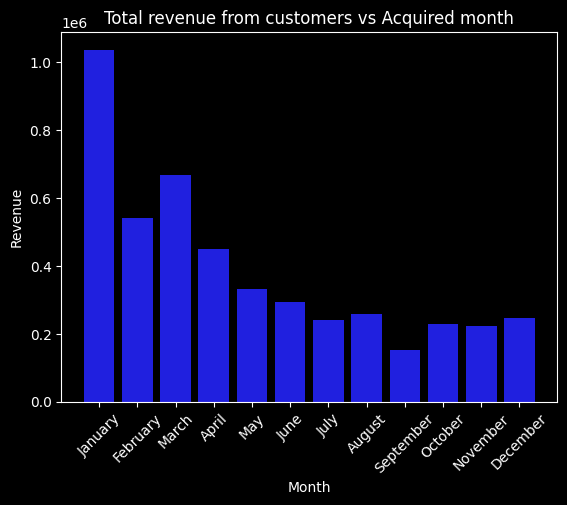

In [331]:
sns.barplot(gdf , x = 'month' , y = 'revenue' , color = 'blue')
plt.xticks(rotation = 45)
plt.title('Total revenue from customers vs Acquired month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.plot()

### **Logic Used:**

- Aggregate based on Acquired Month -> Month of first purchase.

---

## 📊 Insight from the Graph: Total Revenue from Customers vs Acquired Month

This bar chart visualizes the total revenue generated from customers grouped by their month of acquisition (i.e., when they made their first purchase).

### **🔍 Key Observations:**

- January dominates in revenue generation, contributing over ₹1 million. This cohort significantly outperforms all others.

- There's a steady decline from February to June, indicating that customers acquired later tend to contribute less revenue.

- August shows the lowest revenue, suggesting weak customer acquisition or poor retention during this month.

- October to December show slight recovery, but still well below the early months.

---

### **🧠 Business Insights:**

**Strong Start in Q1: Customers acquired early in the year (Jan–Mar) tend to have higher revenue contribution, possibly due to:**

- New Year campaigns

- Fresh marketing budgets

- Early loyalty building

**Q3 Weakness (Jul–Sep):**

- Acquisition during these months might be less effective.

- Customers might be less engaged or not retained well.

- Seasonal slowness or ineffective campaigns could be factors.

---

### **✅ Strategic Recommendations:**

**For Acquisition:**

- Replicate Q1 strategies: Study the marketing, offers, and product trends from January to March and reuse or adapt them in slower months.

- Boost Q3 efforts: Increase marketing spend, optimize landing pages, and consider special mid-year sales to lift July–September performance.

**For Retention:**

- Introduce long-term engagement strategies for customers acquired after April.

- Provide time-sensitive incentives (e.g., loyalty points expiry, gamified challenges) to stimulate repeated purchases.

**For LTV Growth:**

- Consider nurturing lower-value cohorts through upsell and cross-sell campaigns.

- Segment these cohorts and run targeted win-back email/SMS campaigns.


### Q.14 Do customers who use coupons have a different average transaction value compared to those who do not?

Conduct a statistical test to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?


In [332]:
# import a library to perform a Z-test
from statsmodels.stats import weightstats as stests
from scipy import stats
from scipy.stats import ttest_ind

In [333]:
crevenue = purchases[['customerid' , 'transaction_id' , 'revenue' , 'coupon_status']]
crevenue = crevenue[(crevenue['coupon_status'] == 'Used') | (crevenue['coupon_status'] == 'Not Used')]
crevenue

,customerid,transaction_id,revenue,coupon_status
0,17850,16679,153.71,Used
1,17850,16680,153.71,Used
2,17850,16681,2.05,Used
3,17850,16682,87.65,Not Used
4,17850,16682,16.50,Used
...,...,...,...,...
52911,15781,48489,3.47,Used
52912,15781,48489,16.30,Used
52915,14410,48491,121.30,Not Used
52920,14410,48494,48.92,Used


In [334]:
gdf = crevenue.groupby('coupon_status').agg({'revenue':'mean'}).reset_index()
gdf

,coupon_status,revenue
0,Not Used,90.525064
1,Used,87.177061


In [335]:
used = crevenue[crevenue['coupon_status'] == 'Used']['revenue']
nused = crevenue[crevenue['coupon_status'] == 'Not Used']['revenue']

In [336]:
used.head()

0    153.71
1    153.71
2      2.05
4     16.50
5     77.25
Name: revenue, dtype: float64

In [337]:
tstat , pval = ttest_ind(used , nused , equal_var= False , nan_policy='omit')

umean = used.mean()
nmean = nused.mean()
umean , nmean , tstat , pval

(np.float64(87.17706099195709),
 np.float64(90.52506424511984),
 np.float64(-1.4439282591724714),
 np.float64(0.14877930359947447))

### **Logic Used:**

- Perform statistical test on two groups.

---

### **🧪 Statistical Conclusion:**

- The p-value > 0.05, meaning the difference in transaction values is not statistically significant.

- Customers who use coupons do not spend significantly less or more than those who do not, at the transaction level.

---

### **🧠 Business Implications:**

- Coupons may not erode revenue per transaction as feared—this can justify their continued use.

- Since coupon users spend nearly the same, focus can shift to using coupons as acquisition or retention tools, rather than only price-slashing tactics.

---

**You can:**

- Use personalized coupon targeting for high-LTV cohorts.

- Introduce minimum spend thresholds to encourage higher order values when using coupons.

- Optimize campaigns to attract volume rather than value.


### Q.15 Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?

    Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?


    1.across locatoins


In [338]:
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [339]:
customers.head()

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [340]:
mdf = customers.merge(purchases , how = 'right' , on = 'customerid')
mdf.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50


In [341]:
locations = mdf.groupby('location').agg({'revenue':lambda x : np.mean(x).round(2) , 'transaction_id':'count'}).rename(columns = {'transaction_id':'transactions'}).reset_index()
cities = locations['location'].unique()
locations , cities

(        location  revenue  transactions
 0     California    89.39         16136
 1        Chicago    88.46         18380
 2     New Jersey    90.98          4503
 3       New York    83.86         11173
 4  Washington DC    93.62          2732,
 array(['California', 'Chicago', 'New Jersey', 'New York', 'Washington DC'],
       dtype=object))

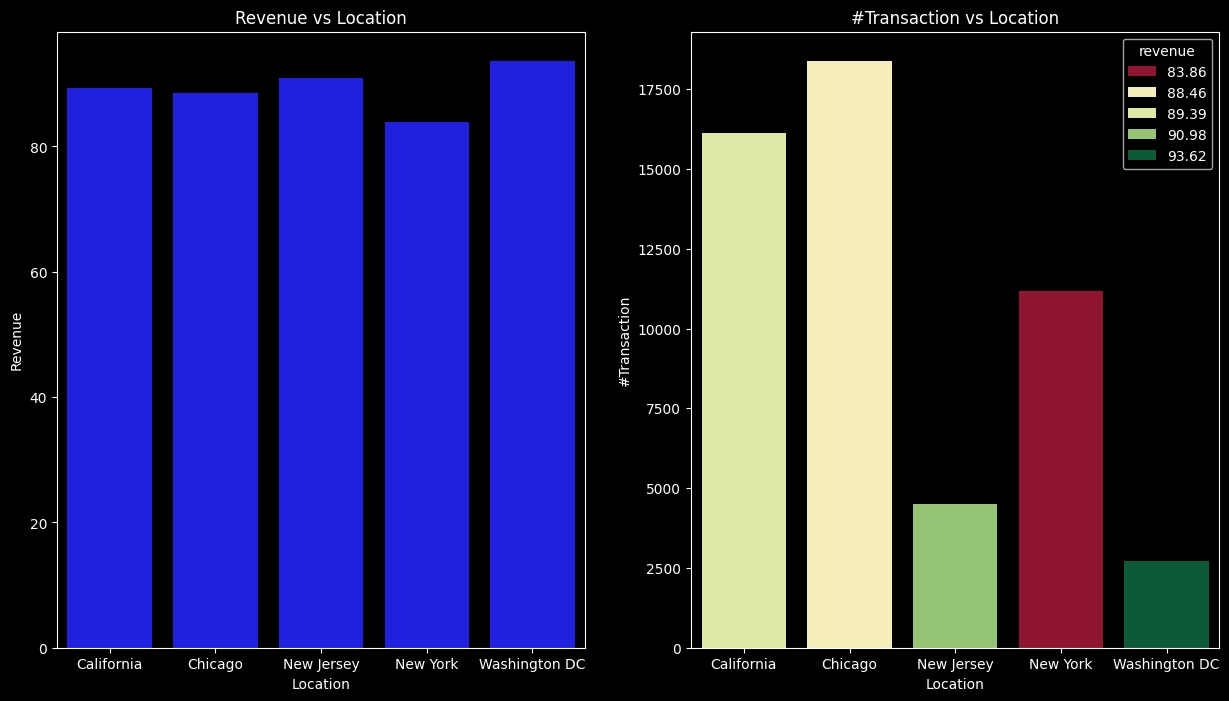

In [342]:
figure , axes = plt.subplots(1,2 , figsize = ( 15 , 8))
plt.sca(axes[0])
sns.barplot(locations , x = 'location' , y = 'revenue' , color = 'blue')
plt.title('Revenue vs Location')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.sca(axes[1])
sns.barplot(locations , x = 'location' , y = 'transactions' , hue = 'revenue' , palette = 'RdYlGn')
plt.title('#Transaction vs Location')
plt.xlabel('Location')
plt.ylabel('#Transaction')
plt.savefig('./images/q15.png')
plt.show()

In [343]:
#perform annova for avg transaction price in different locaitons:
#   ho: the mean avg transaction price for each location is similar
#   h1: they are different
# alpha = 0.05

In [344]:
clist = [mdf[mdf['location'] == city]['revenue'] for city in cities]
stats.f_oneway(clist[0] , clist[1] , clist[2] , clist[3] , clist[4] )

F_onewayResult(statistic=np.float64(3.2449582892340105), pvalue=np.float64(0.011381390904730159))

In [345]:
#Analyse delivery charge tiers:
mdf['dtier'] = pd.qcut(mdf['delivery_charges'] , q = 3 , labels=['low' , 'mid' , 'high'])
mdf.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71,mid
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71,mid
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05,mid
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65,mid
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50,mid


In [346]:
dtier = mdf.groupby('dtier').agg({'revenue':lambda x: np.mean(x).round(2) , 'transaction_id':'count'}).reset_index().rename(columns={'transaction_id':'transactions'})
dtier

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_24752/2140648042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dtier = mdf.groupby('dtier').agg({'revenue':lambda x: np.mean(x).round(2) , 'transaction_id':'count'}).reset_index().rename(columns={'transaction_id':'transactions'})


,dtier,revenue,transactions
0,low,77.72,26963
1,mid,101.82,15862
2,high,95.09,10099


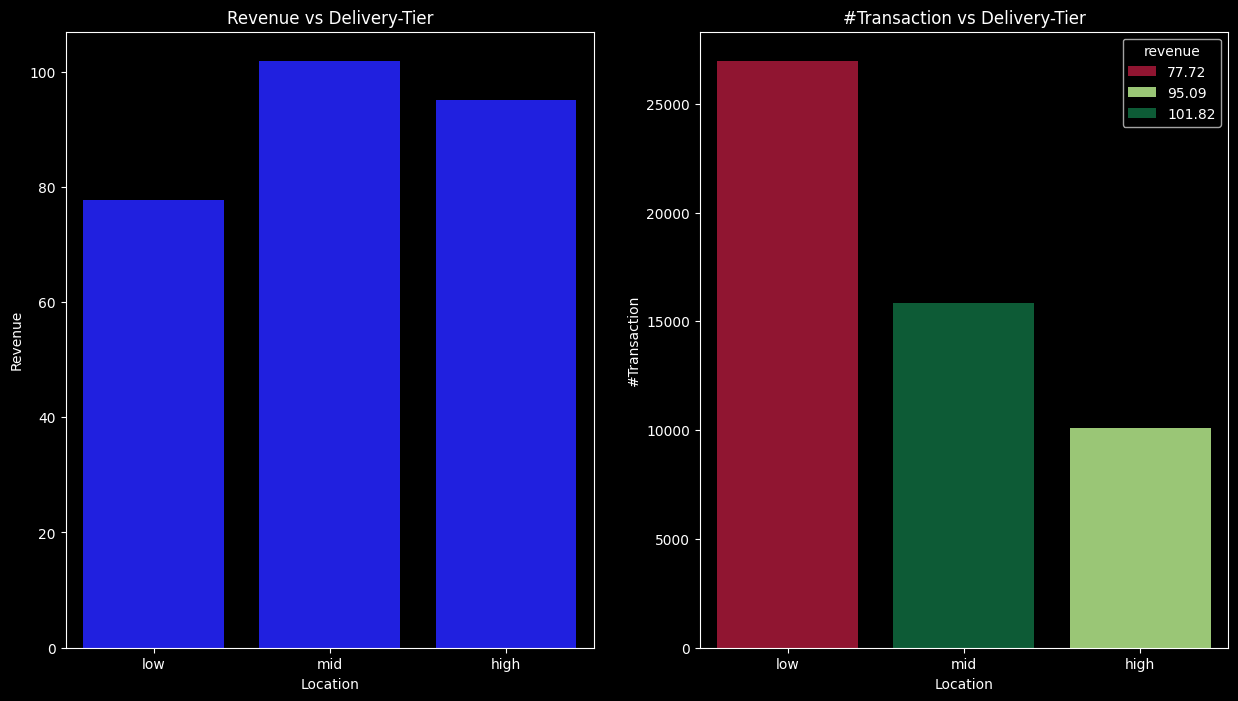

In [347]:
figure , axes = plt.subplots(1,2 , figsize = ( 15 , 8))
plt.sca(axes[0])
sns.barplot(dtier , x = 'dtier' , y = 'revenue' )
plt.title('Revenue vs Delivery-Tier')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.sca(axes[1])
sns.barplot(dtier , x = 'dtier' , y = 'transactions' , hue = 'revenue' , palette = 'RdYlGn')
plt.title('#Transaction vs Delivery-Tier')
plt.xlabel('Location')
plt.ylabel('#Transaction')
plt.savefig('./images/q15.2.png')
plt.show()

In [348]:
dlist = [mdf[mdf['dtier'] == cat]['revenue'] for cat in ['low' , 'mid' , 'high']]
stats.f_oneway(dlist[0] , dlist[1])

F_onewayResult(statistic=np.float64(212.59502007758172), pvalue=np.float64(4.8641723376862866e-48))

In [349]:
#location and delivery tier combined:
table = mdf.groupby(['location' , 'dtier']).agg({'revenue':lambda x : x.mean().round(2)}).unstack()
table.reset_index()

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_24752/3374417007.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = mdf.groupby(['location' , 'dtier']).agg({'revenue':lambda x : x.mean().round(2)}).unstack()


location revenue               
dtier                    low     mid   high
0         California   79.61  100.43  97.69
1            Chicago   79.32   98.72  96.64
2         New Jersey   77.51  114.56  91.02
3           New York   72.14   98.97  92.65
4      Washington DC   79.57  118.34  83.02

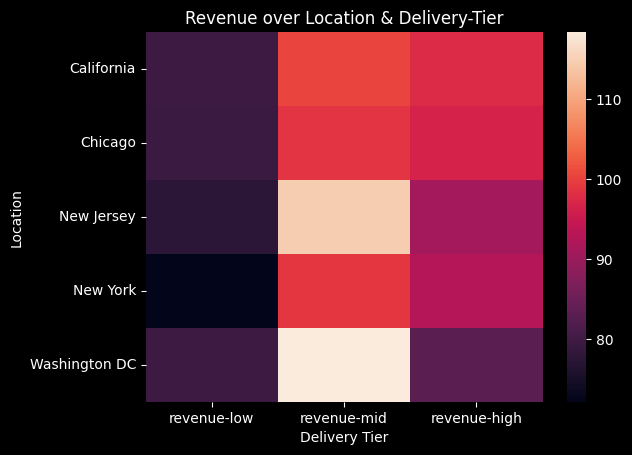

In [350]:
sns.heatmap(table)
plt.xlabel('revenue-delivery-tier')
plt.title('Revenue over Location & Delivery-Tier')
plt.xlabel('Delivery Tier')
plt.ylabel('Location')
plt.savefig('./images/q15.3.png')
plt.show()

### 📊 Combined Insights from Graphs and Statistical Tests on Purchase Behavior

### **🔍 1. Revenue vs Location + Transaction Count (Graph 1 + ANOVA)**

- F-statistic = 3.24, p-value = 0.0114 → Significant Difference

  | Location      | Avg Revenue | #Transactions     | Insight                       |
  | ------------- | ----------- | ----------------- | ----------------------------- |
  | Washington DC | ₹93.62      | Low (~2700)       | High spenders, premium market |
  | New Jersey    | ₹90.98      | Low (~4500)       | High-value, niche market      |
  | New York      | ₹83.86      | High (~11,000)    | Low-value, high-volume market |
  | Chicago       | ₹88.46      | Highest (~18,000) | Popular but moderately priced |
  | California    | ₹89.39      | Very High         | Balanced performance          |

#### **📌 Implications:**

- Region matters: Revenue per transaction varies significantly by location.

**Personalized regional strategies are justified:**

- Upsell bundles in NY.

* Exclusive premium campaigns in Washington DC.

---

### **🔍 2. Revenue vs Delivery Tier (Graph 2 + ANOVA)**

- F-statistic = 212.6, p-value = 4.86e-48 → Highly Significant Difference

  | Delivery | Tier    | Avg Revenue        | #Transactions Insight                       |
  | -------- | ------- | ------------------ | ------------------------------------------- |
  | Low      | 77.72   | Highest (~27,000)  | Budget-friendly, high churn                 |
  | Mid      | ₹101.82 | Moderate (~16,000) | Best balance of volume and value            |
  | High     | ₹95.09  | Lowest (~10,000)   | Possibly premium shipping with fewer orders |

#### **📌 Implications:**

- Delivery pricing strongly influences spending.

**Consider:**

- Tiered pricing models: Incentivize upsells at mid-tier.

- Minimum order value for free shipping in low-tier zones.

- Premium delivery perks for high-tier buyers.

---

### **🔍 3. Heatmap: Revenue Across Location × Delivery Tier (Graph 3)**

**Observation Insight:**

- New Jersey Mid-tier = Highest revenue (₹114.56) Optimize promotions for this segment.
- Washington DC Mid-tier is also strong Push exclusive, premium delivery benefits.
- New York Low-tier = Lowest revenue Price-sensitive group—use discounts & volume offers.

### **💼 Strategic Recommendations:**

**🔹 Geo-Demographic Targeting**

- Customize campaigns based on location and delivery tier combinations.

- Prioritize high-potential pockets like New Jersey-mid and Washington DC-mid.

**🔹 Pricing Personalization**

Delivery-sensitive behavior warrants:

- Free shipping thresholds

- Bundled offers for high-tier zones

- Subscription models for high-frequency low-tier users

**🔹 Product Placement & Messaging**

- In New York, promote "value-for-money" products.

- In Washington DC, highlight exclusivity, speed, and concierge-like services.


### Q.16 Does customer tenure impact purchase frequency?

    Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?


In [351]:
customers

,customerid,gender,location,tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [352]:
pcounts = purchases.groupby('customerid').agg({'transaction_id':'count'}).reset_index().rename(columns={'transaction_id':'pfreq'})
pcounts

,customerid,pfreq
0,12346,2
1,12347,60
2,12348,23
3,12350,17
4,12356,36
...,...,...
1463,18259,7
1464,18260,40
1465,18269,8
1466,18277,1


In [353]:
mdf = pcounts.merge(customers[['customerid', 'tenure_months']] , on = 'customerid')
mdf

,customerid,pfreq,tenure_months
0,12346,2,31
1,12347,60,20
2,12348,23,39
3,12350,17,25
4,12356,36,31
...,...,...,...
1463,18259,7,5
1464,18260,40,43
1465,18269,8,25
1466,18277,1,47


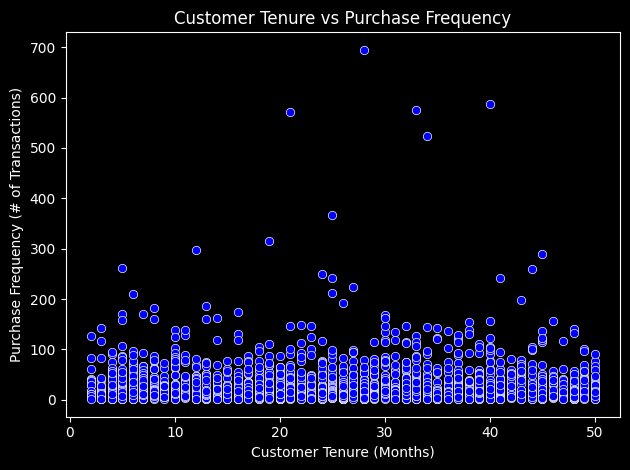

In [354]:
sns.scatterplot(mdf , x= 'tenure_months' , y = 'pfreq')
plt.title('Customer Tenure vs Purchase Frequency')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Purchase Frequency (# of Transactions)')
# plt.grid(True)
plt.tight_layout()
plt.savefig('./images/q16.png')
plt.show()

In [355]:
mdf['tenure_months'].corr(mdf['pfreq']).round(3)


np.float64(0.011)

### **Logic Used:**

- Get tenures from customers data.
- Compute freq of each customer from transactions data.

---

### 📈 Analysis: Customer Tenure vs Purchase Frequency

- The scatter plot titled "Customer Tenure vs Purchase Frequency" provides a visual understanding of how long a customer has been associated with the company (in months) and how often they have purchased.

---

### **🔍 Observations from the Plot:**

**Highly Scattered Relationship:**

- The data points are widely spread with no clear upward or downward trend.

- Customers with both short and long tenure exhibit high and low frequencies.

**Few High-Frequency Outliers:**

- A handful of customers make over 300–700 purchases, but these are rare and not tenure-dependent.

**Clustered Low-Activity Majority:**

- Most customers, regardless of tenure, have fewer than 100 transactions.

- There is no strong clustering toward higher frequency with longer tenure.

**Flat Correlation:**

(As seen from the plot and confirmed by earlier result: correlation ≈ 0.011) → virtually no linear relationship between tenure and purchase frequency.

---

### **✅ Conclusion:**

- Customer tenure does not significantly impact purchase frequency.

- This means just because a customer has been around longer doesn’t guarantee they'll purchase more often.

---

### **💡 Strategic Implications:**

**🔹 1. Don't Rely Solely on Time-Based Loyalty**

- Tenure is not a strong predictor of engagement.

- Focus instead on behavioral triggers, product affinity, or seasonal activity.

**🔹 2. Build Frequency via Engagement Campaigns**

Encourage repeat purchases via:

- Email nudges

Time-limited discounts

- Reward-based frequency programs

**🔹 3. Segment by Activity, Not Just Tenure**

- Segment users by recency + frequency, not just how long they've been customers.

      For example:

      "New & High Frequency"

      "Long-Term Dormant"

      "Churn-Risk Recent Joiners"

**🔹 4. Design Milestone Incentives**

- Celebrate tenure only if tied to meaningful activity.

      Example: “6-Month Anniversary — Here’s 10% Off Your Next Order!”


### Q.17 Analyze the relationship between delivery charges and order behavior.

    Are there opportunities to optimize delivery pricing to increase order quantities or revenue?


In [356]:
purchases['dtier'] = pd.qcut(purchases['delivery_charges'] , q = 3 , labels = ['low' , 'mid' , 'high'])
purchases.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71,mid
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,January,153.71,mid
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,January,2.05,mid
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,January,87.65,mid
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,January,16.50,mid


In [357]:
dtier = purchases.groupby('dtier').agg({'transaction_id' : 'count' , 'revenue':'mean' , 'quantity':'mean'}).reset_index()
dtier.rename(columns = {'transaction_id':'freq' , 'revenue':'avg revenue', 'quantity':'avg quantity'} , inplace = True)
dtier

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_24752/693315051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dtier = purchases.groupby('dtier').agg({'transaction_id' : 'count' , 'revenue':'mean' , 'quantity':'mean'}).reset_index()


,dtier,freq,avg revenue,avg quantity
0,low,26963,77.716060,2.971183
1,mid,15862,101.817094,3.427563
2,high,10099,95.089983,10.253788


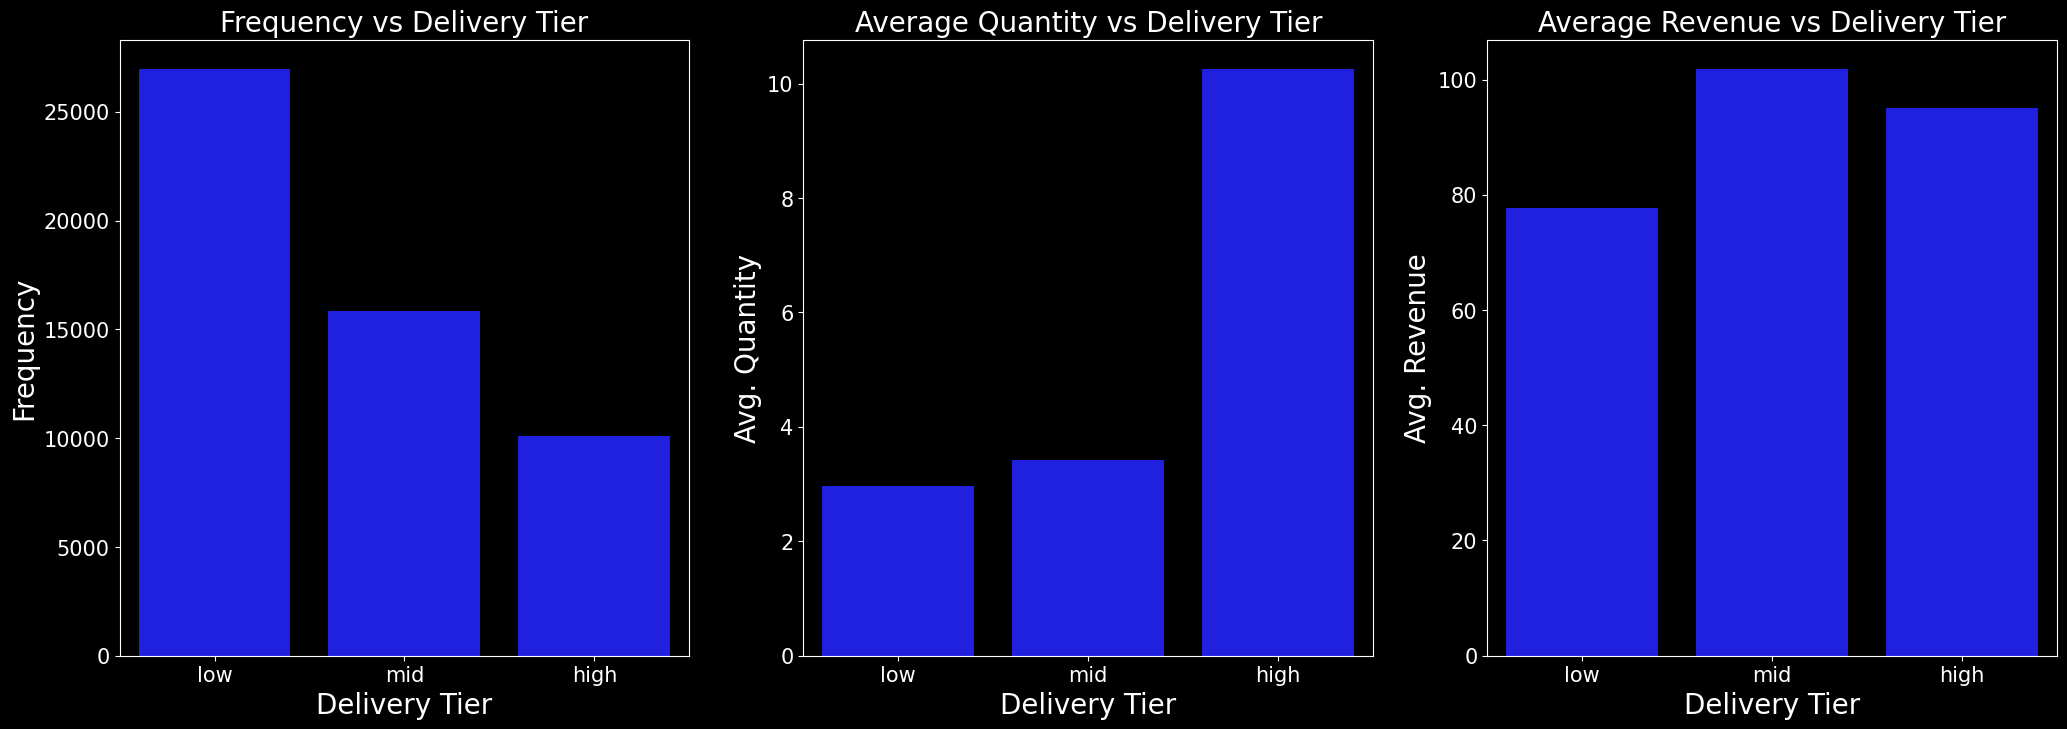

In [358]:
fig , axes = plt.subplots(1,3 , figsize = (25,8))
plt.sca(axes[0])
sns.barplot(dtier , x = 'dtier' , y = 'freq')
plt.title('Frequency vs Delivery Tier' , fontsize = 20)
plt.xlabel('Delivery Tier' , fontsize = 20)
plt.ylabel('Frequency' , fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)


plt.sca(axes[1])
sns.barplot(dtier , x = 'dtier' , y = 'avg quantity')
plt.title('Average Quantity vs Delivery Tier' , fontsize = 20)
plt.xlabel('Delivery Tier' , fontsize = 20)
plt.ylabel('Avg. Quantity' , fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)


plt.sca(axes[2])
sns.barplot(dtier , x = 'dtier' , y = 'avg revenue')
plt.title('Average Revenue vs Delivery Tier' , fontsize = 20)
plt.xlabel('Delivery Tier' , fontsize = 20)
plt.ylabel('Avg. Revenue' , fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.savefig('./images/q17.png')
plt.show()

### **🔍 Visual Insight from Chart:**

| Delivery Tier | Order Frequency | Avg. Quantity | Avg. Revenue |
| ------------- | --------------- | ------------- | ------------ |
| Low           | ~27,000 orders  | ~3 items      | ₹77.72       |
| Mid           | ~16,000 orders  | ~3.4 items    | ₹101.82      |
| High          | ~10,000 orders  | ~10.2 items   | ₹95.09       |

---

### **🧠 Interpretation of Customer Behavior:**

**✅ Low Tier (Most Popular)**

- Dominates in volume, but has:

  - Lowest average revenue

  - Lowest quantity per transaction

  - Indicates price sensitivity.

* Customers likely favor low delivery fees even if it means smaller, frequent purchases.

**✅ Mid Tier (Sweet Spot)**

- Generates highest average revenue per transaction.

- Balanced frequency and decent order size.

- Suggests customers accept slightly higher delivery charges if value is clear.

**✅ High Tier (Bulk Buyers)**

- Fewest transactions but largest quantity per order.

- Revenue per transaction is strong, but less than mid-tier despite high quantities.

- Likely businesses or bulk shoppers who are willing to pay delivery fees for volume convenience.

---

### **📈 ANOVA Support:**

- F-statistic = 212.60, p-value ≈ 4.86e-48 → Strong evidence of significant behavioral differences across delivery tiers

---

### **🎯 Strategic Recommendations:**

**🔹 1. Optimize Mid-Tier Delivery Strategy**

- This is the most lucrative tier.

- Keep pricing as-is, or test small incentives like:

  - “Free delivery on your 3rd order this month”

  - “Rs. 20 cashback with mid-tier delivery”

**🔹 2. Grow Low-Tier Revenue**

- Introduce order-value based rewards:

  - “Spend ₹500, get free delivery”

  - “Flat ₹20 off on combos”

**🔹 3. Justify High-Tier Pricing**

- Offer exclusive perks:

  - Express delivery

  - Premium packaging

  - Loyalty points multipliers

- These buyers are valuable; make the experience worth the price.

**🔹 4. Segment Campaigns by Delivery Behavior**

- Use machine learning to cluster customers by their preferred tier and optimize personalized offers.

---

### **💡 Opportunities:**

Objective Strategy

- Increase revenue in low tier Push bundles, free shipping thresholds
- Maintain mid-tier profit Focus on value communication
- Boost high-tier conversions Premium services or subscription models

---

### **✅ Final Takeaway:**

- Delivery charges directly influence how often and how much customers order.
- Tailoring delivery pricing and perks to tier-specific behavior can unlock new revenue and retention growth.


### Q18. Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?


In [359]:
tax = pd.read_excel('./data/Tax_amount.xlsx')
tax.columns = [str.lower(column) for column in tax.columns]
tax.head()

,product_category,gst
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [360]:
taxm = tax.merge(purchases , on = 'product_category' , how = 'right')
taxm.head()

,product_category,gst,customerid,transaction_id,transaction_date,product_sku,product_description,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier
0,Nest-USA,0.10,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid
1,Nest-USA,0.10,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid
2,Office,0.10,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,1,2.05,6.5,Used,1,January,2.05,mid
3,Apparel,0.18,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,5,17.53,6.5,Not Used,1,January,87.65,mid
4,Bags,0.18,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,1,16.50,6.5,Used,1,January,16.50,mid


In [361]:
taxm['ttier'] = pd.qcut(taxm['gst'] , q = 3 , duplicates= 'drop', labels = ['low' , 'high'])
taxm.head()

,product_category,gst,customerid,transaction_id,transaction_date,product_sku,product_description,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier,ttier
0,Nest-USA,0.10,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low
1,Nest-USA,0.10,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low
2,Office,0.10,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,1,2.05,6.5,Used,1,January,2.05,mid,low
3,Apparel,0.18,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,5,17.53,6.5,Not Used,1,January,87.65,mid,high
4,Bags,0.18,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,1,16.50,6.5,Used,1,January,16.50,mid,high


In [362]:
#revenue by tax tier:
gdf = taxm.groupby('ttier').agg({'revenue':'sum' , 'transaction_id':'count'}).reset_index().rename(columns = {'transaction_id':'freq'})
gdf

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_24752/3231772372.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdf = taxm.groupby('ttier').agg({'revenue':'sum' , 'transaction_id':'count'}).reset_index().rename(columns = {'transaction_id':'freq'})


,ttier,revenue,freq
0,low,3633315.63,25459
1,high,1037478.99,27465


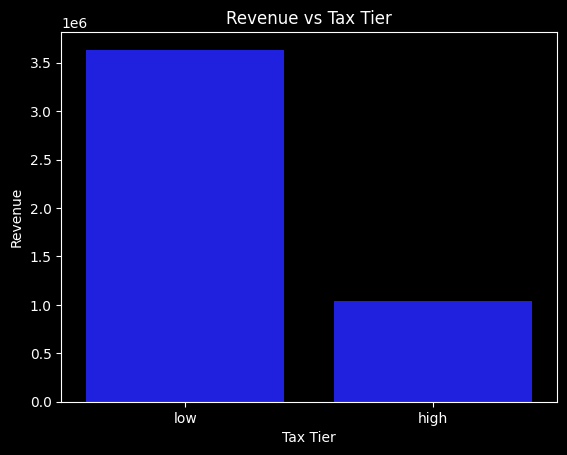

In [363]:
sns.barplot(gdf , x = 'ttier' , y = 'revenue')
plt.title('Revenue vs Tax Tier')
plt.xlabel('Tax Tier')
plt.ylabel('Revenue')
plt.savefig('./images/q18.1.png')
plt.show()

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_24752/615509974.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = taxm.groupby(['ttier', 'dtier']).agg({'revenue':lambda x : x.mean().round(3)}).unstack()


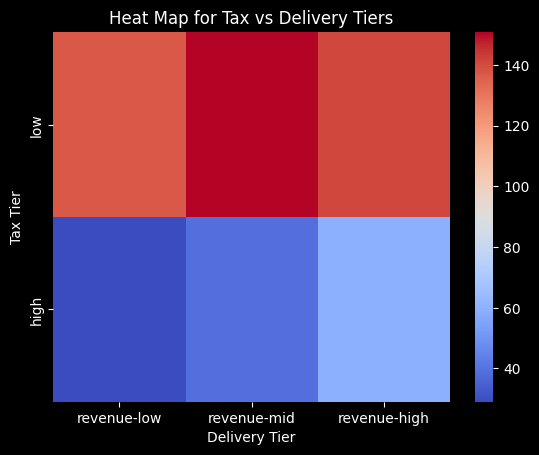

In [364]:
#combining both delivery tier and tax tier:
table = taxm.groupby(['ttier', 'dtier']).agg({'revenue':lambda x : x.mean().round(3)}).unstack()
sns.heatmap(table , cmap = 'coolwarm')
plt.title('Heat Map for Tax vs Delivery Tiers')
plt.xlabel('Delivery Tier')
plt.ylabel('Tax Tier')
plt.savefig('./images/q18.2.png')
plt.show()

### 📊 Analysis: Impact of Taxes and Delivery Charges on Customer Spending Behavior

### **🔍 1. Revenue vs Tax Tier**

| Tax Tier | Revenue (₹)   | Observation                     |
| -------- | ------------- | ------------------------------- |
| Low      | ~3.6 million  | 🔝 Dominates revenue generation |
| High     | ~1.05 million | 🔻 Significant drop             |

**✅ Interpretation:**

- Low-tax items lead to far greater spending.

- Customers clearly prefer products with lower tax rates, possibly due to:

- Perceived savings

- Better affordability

---

### **🔍 2. Heatmap: Tax Tier × Delivery Tier**

| Tax Tier | Revenue-Low | Revenue-Mid     | Revenue-High | Insight                                                          |
| -------- | ----------- | --------------- | ------------ | ---------------------------------------------------------------- |
| Low      | High        | Highest         | High         | Customers spend more across all delivery tiers when tax is low.  |
| High     | Low         | Slightly Better | Moderate     | Even with higher delivery tiers, high-tax products underperform. |

**✅ Interpretation:**

- Even when delivery charges are low, high-tax products still perform poorly.

- Mid delivery tier + low tax is the best performing combo.

- High delivery + high tax is the least attractive combo for customers.

---

### **🧠 Strategic Implications:**

🔹 1. Product Mix & Promotions

- Promote low-tax products aggressively—customers already prefer them.

- Bundle high-tax products with low-tax ones to balance perceived value.

🔹 2. Delivery Subsidy for High-Tax Products

- Reduce or eliminate delivery charges for high-tax product categories.

- “Free delivery on electronics” or “0 delivery fee on lifestyle items”

- Helps soften the price shock from high GST.

🔹 3. Dynamic Discounting

- For high-tax and high-delivery combos, apply seasonal or flash discounts.

- Incentivize bulk orders of high-tax products to dilute overall effective cost.

🔹 4. Segmented Campaigns

- Target high-value customers with discounts on high-tax categories.

- For budget customers, promote low-tax, mid-delivery tier bundles.

---

### **💡 Optimization Opportunities:**

- Target Behavior Strategy

- Reduce cart abandonment Reduce delivery on high-tax items

- Boost high-tax category sales Offer tax-absorbing discounts or cashback

- Encourage bundling Combine low-tax with high-tax items

- Maximize mid-tier margin Promote mid-delivery tier as “best value”

---

### **✅ Final Takeaway:**

- Taxes and delivery charges both heavily influence customer spending—
  especially together.
- Optimizing these two levers via tiered discounts, bundling, and dynamic delivery offers can significantly boost both customer satisfaction and revenue.


### Q.19 Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?


In [365]:
taxm['mperiod'] = df['transaction_date'].dt.to_period('M')
taxm.head()

,product_category,gst,customerid,transaction_id,transaction_date,product_sku,product_description,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier,ttier,mperiod
0,Nest-USA,0.10,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low,2019-01
1,Nest-USA,0.10,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low,2019-01
2,Office,0.10,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,1,2.05,6.5,Used,1,January,2.05,mid,low,2019-01
3,Apparel,0.18,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,5,17.53,6.5,Not Used,1,January,87.65,mid,high,2019-01
4,Bags,0.18,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,1,16.50,6.5,Used,1,January,16.50,mid,high,2019-01


In [466]:
#seasional trend in product-categories:
# taxm.head()
table = taxm.groupby(['product_category' , 'mperiod']).agg({'revenue':'sum'}).unstack()
table.fillna(0 , inplace = True)

catdev = taxm.groupby(['product_category' , 'month']).agg({'revenue':'sum' , 'mperiod' : 'first'}).reset_index().sort_values(by = 'mperiod')
# catdev['mperiod'] = catdev['mperiod'].astype(str)
catdev.head()

,product_category,month,revenue,mperiod
14,Android,January,74.24,2019-01
68,Drinkware,January,14599.09,2019-01
152,Nest-Canada,January,9591.11,2019-01
34,Backpacks,January,268.19,2019-01
23,Apparel,January,38300.87,2019-01


In [467]:
#seasional trend by locations:
mdf = customers.merge(taxm , on = 'customerid' , how = 'right')
mdf.head()

,customerid,gender,location,tenure_months,product_category,gst,transaction_id,transaction_date,product_sku,product_description,quantity,avg_price,delivery_charges,coupon_status,mnum,month,revenue,dtier,ttier,mperiod
0,17850,M,Chicago,12,Nest-USA,0.10,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low,2019-01
1,17850,M,Chicago,12,Nest-USA,0.10,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,6.5,Used,1,January,153.71,mid,low,2019-01
2,17850,M,Chicago,12,Office,0.10,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,1,2.05,6.5,Used,1,January,2.05,mid,low,2019-01
3,17850,M,Chicago,12,Apparel,0.18,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,5,17.53,6.5,Not Used,1,January,87.65,mid,high,2019-01
4,17850,M,Chicago,12,Bags,0.18,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,1,16.50,6.5,Used,1,January,16.50,mid,high,2019-01


In [468]:
locationTable = mdf.groupby(['location', 'month']).agg({'revenue':'sum'}).unstack()
locationTable.fillna( 0 , inplace = True)



localrev = mdf.groupby(['location', 'month']).agg({'revenue':'mean' , 'mperiod':'first'}).reset_index().sort_values('mperiod')
localrev['revenue'] = pd.to_numeric(localrev['revenue'], errors='coerce')
# localrev['mperiod'] = localrev['mperiod'].astype(str)
localrev.head()

,location,month,revenue,mperiod
28,New Jersey,January,99.922921,2019-01
4,California,January,100.765681,2019-01
40,New York,January,92.564828,2019-01
16,Chicago,January,103.886333,2019-01
52,Washington DC,January,95.418672,2019-01


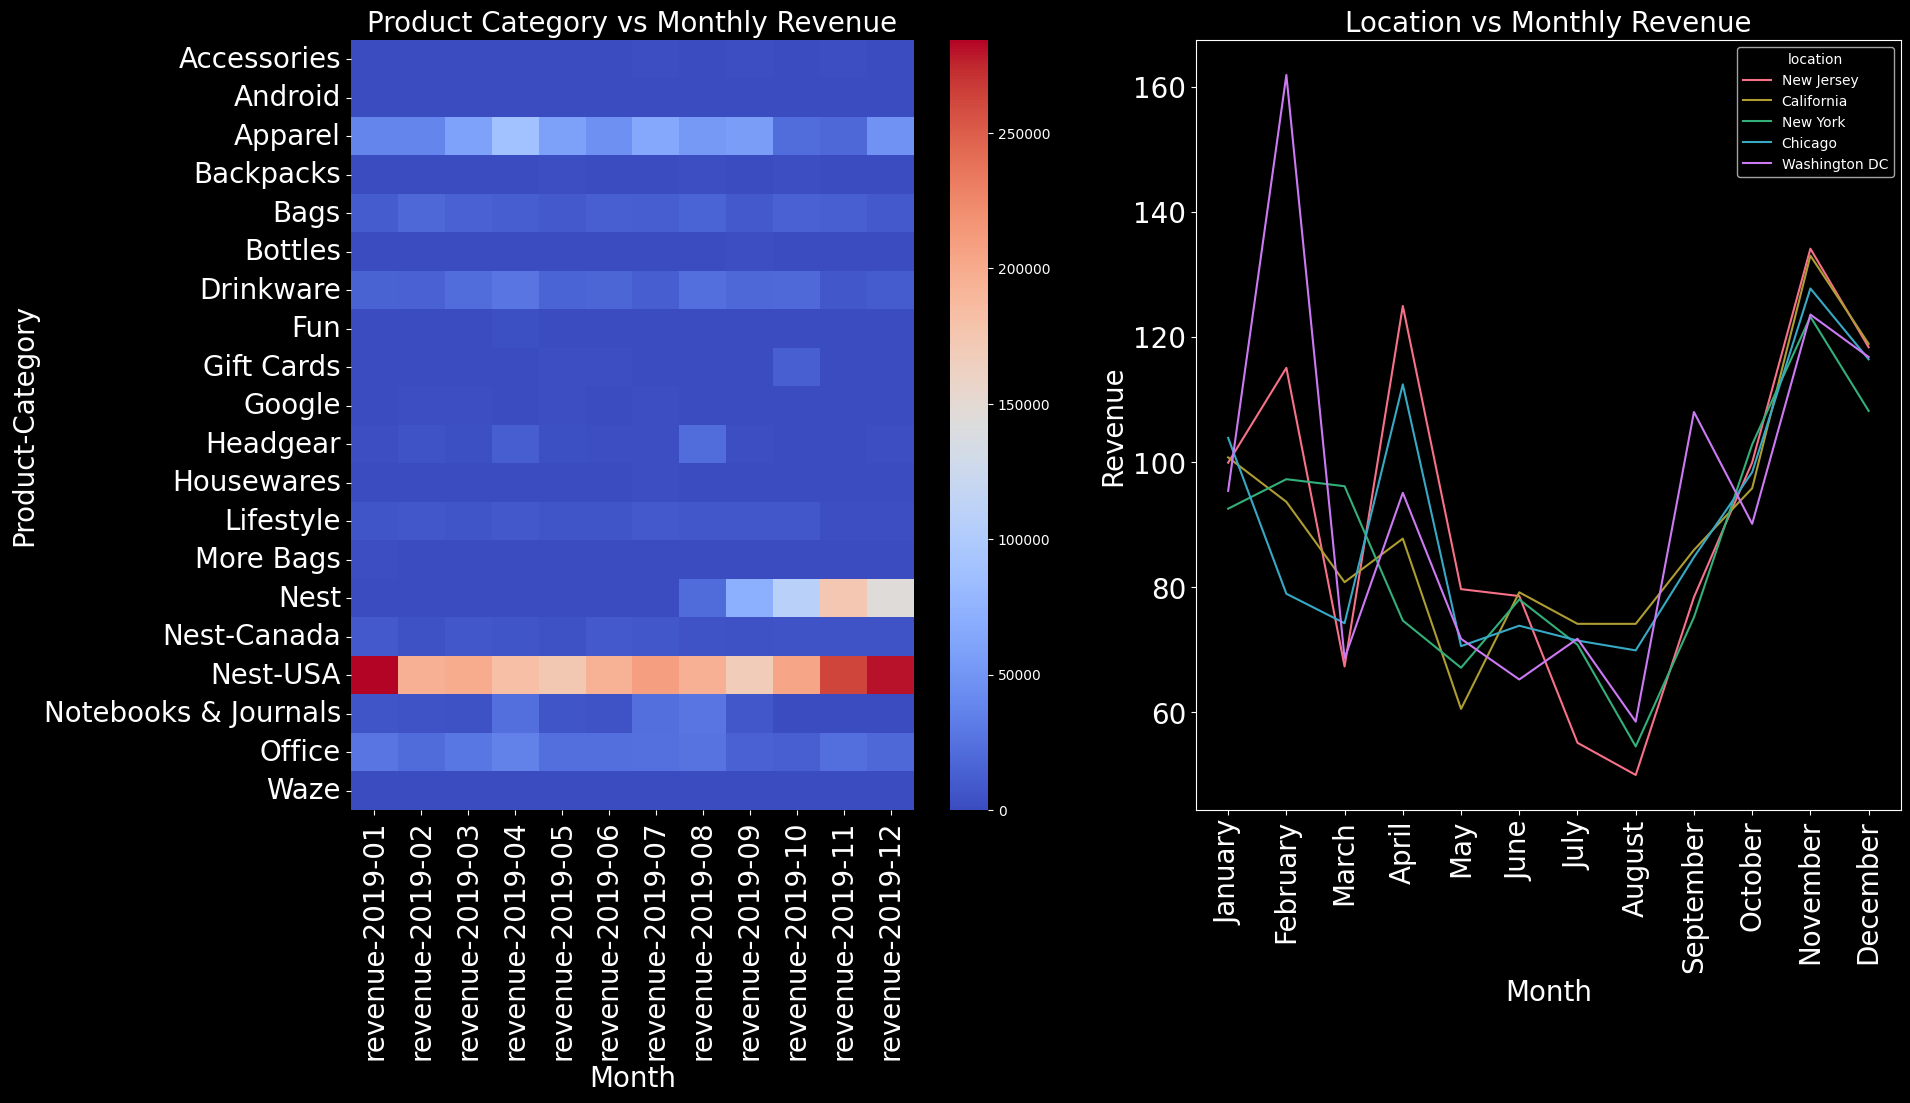

In [470]:
fig , axes = plt.subplots(1, 2, figsize = (20,10))
plt.sca(axes[0])
# sns.lineplot(catdev , x = 'month' , y = 'revenue' , hue = 'product_category')
sns.heatmap(table , cmap = 'coolwarm')
plt.title('Product Category vs Monthly Revenue' , fontsize = 20)
plt.ylabel('Product-Category' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
plt.xticks(rotation = 90 , fontsize = 20)
plt.yticks(fontsize = 20)


plt.sca(axes[1])
plt.title('Location vs Monthly Revenue' , fontsize = 20)
sns.lineplot(localrev , x = 'month' , y = 'revenue' , hue = 'location')
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
plt.xticks(rotation = 90 , fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('./images/q19.png')
plt.show()

### 📊 Seasonal Trend Analysis from Heatmaps:

### **🔍 A. Category-Wise Seasonal Trends**

| Product Category     | Peak Months        | Observations                                                                  |
| -------------------- | ------------------ | ----------------------------------------------------------------------------- |
| Nest-USA             | Jan, Mar, May, Dec | Most dominant category throughout the year; peaks in winter & gifting season. |
| Apparel              | Mar–May, Oct–Dec   | Seasonal fashion shifts and festive sales.                                    |
| Drinkware            | May–Aug            | Warm months driving hydration needs.                                          |
| Gift Cards           | Nov–Dec            | Holiday gifting trend.                                                        |
| Office Supplies      | Jan, Sept          | New Year restock and back-to-school spikes.                                   |
| Lifestyle, Bags      | Nov–Dec            | Likely tied to travel, holidays, and gifting.                                 |
| Notebooks & Journals | Jan                | New Year resolutions and productivity tools.                                  |

---

### **🔍 B. Location-Wise Seasonal Trends**

| Location      | High Months        | Insight                                                        |
| ------------- | ------------------ | -------------------------------------------------------------- |
| Chicago       | Oct–Dec, Jan, Mar  | Consistent strength; heavy end-of-year surge.                  |
| California    | Feb, May, Oct, Dec | Balanced across year; warm-weather state with summer interest. |
| New York      | Feb, May, Nov–Dec  | Peaks in gifting/festive months.                               |
| New Jersey    | Apr–Jun            | Subtle seasonal spring rise.                                   |
| Washington DC | Feb, Dec           | Spikes in winter, relatively low rest of the year.             |

---

### **📈 Overall Trends:**

- Q1 (Jan–Mar):

  - Strong for Nest-USA, Office, California, Chicago

  - Associated with renewal shopping: tech, productivity, restocks.

- Q2 (Apr–Jun):

  - Rising sales in Apparel, Drinkware, New Jersey, California

  - Spring fashion, summer essentials begin to pick up.

- Q3 (Jul–Sep):

  - Stable/Low across most categories.

  - Drinkware and some Apparel still active.

- Q4 (Oct–Dec):

  - 🔥 Peak sales period

  - Strong across nearly all high-revenue categories and cities.

  - Fueled by holiday gifting, cold-weather products, seasonal promotions.

---

## **🧠 Strategic Recommendations:**

📦 1. Inventory Management

- Stock high-demand SKUs for Q4 in Nest-USA, Apparel, Gift Cards, and Lifestyle.

- Maintain Drinkware, Apparel stock for Q2-Q3 in California and New Jersey.

🎯 2. Targeted Regional Campaigns
|Region | Strategy|
|-------|---------|
|Chicago | Boost Q4 advertising, loyalty points, and holiday bundles.|
|California | Push warm-weather items in Q2, year-round essentials.|
|New York | Leverage fashion and holiday gifting in Q2 and Q4.|
|Washington DC | Capitalize on end-of-year needs with tax-saving offers and gift campaigns.|

🛍️ 3. Seasonal Promotions

- Jan & Sept: Productivity (office), educational bundles.

- May–Aug: Summer essentials (drinkware, bags).

- Nov–Dec: Heavy holiday campaigns, including gift guides, combo deals, and flash sales.

📈 4. Data-Driven Campaign Calendar

- Create a seasonal marketing calendar tied to actual category-location data:

  E.g., “Apparel Flash Sale – April in New York”

  “Nest Smart Home Bundles – December in Chicago”

---

### **✅ Final Takeaway:**

- The heatmaps clearly show seasonal and regional patterns.
- Strategic timing of inventory, ads, and category pushes can significantly maximize revenue across quarters.


### Q.20 Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?


In [376]:
daily = taxm.groupby('transaction_date').agg({'revenue':'mean' , 'quantity':'sum'}).reset_index().sort_values(by = 'transaction_date')
daily

,transaction_date,revenue,quantity
0,2019-01-01,82.926854,352
1,2019-01-02,116.856261,256
2,2019-01-03,115.141111,816
3,2019-01-04,98.245030,604
4,2019-01-05,91.921640,2392
...,...,...,...
360,2019-12-27,132.636796,278
361,2019-12-28,137.430250,114
362,2019-12-29,134.958090,121
363,2019-12-30,132.270000,121


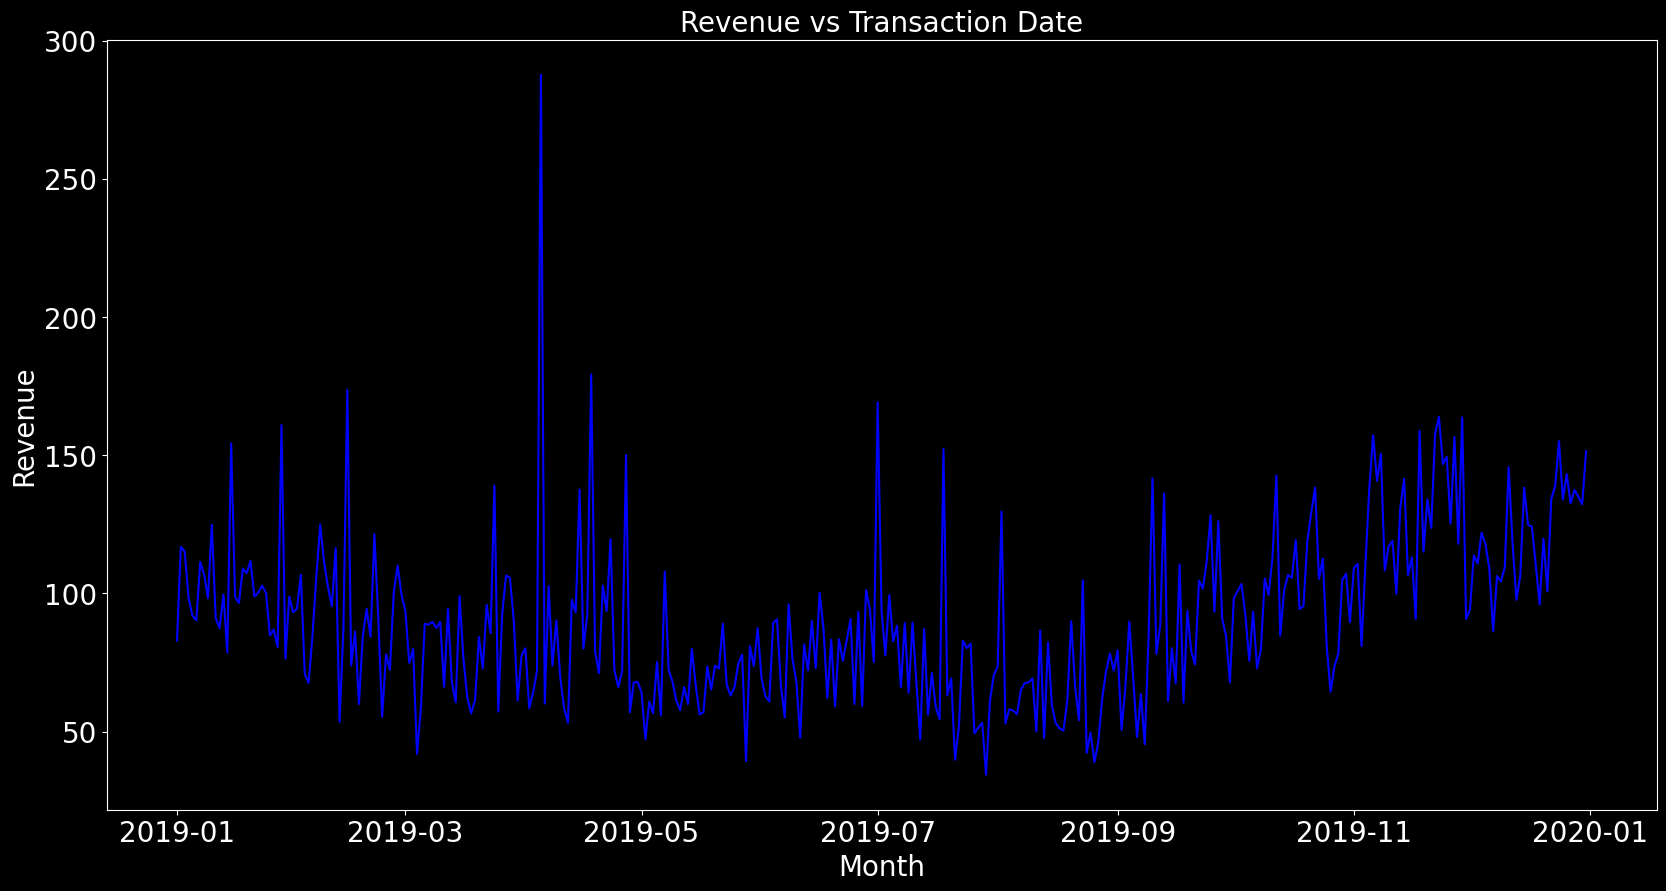

In [377]:
plt.figure(figsize = (20,10))
sns.lineplot(daily , x = 'transaction_date' , y = 'revenue')
plt.title('Revenue vs Transaction Date' , fontsize = 20)
plt.xlabel('Month' , fontsize = 20)
plt.ylabel('Revenue' , fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('./images/q20.png')
plt.show()

In [378]:
daily['day'] = daily['transaction_date'].dt.day_name()
daily['dayn'] = daily['transaction_date'].dt.day % 7
daily.head()

,transaction_date,revenue,quantity,day,dayn
0,2019-01-01,82.926854,352,Tuesday,1
1,2019-01-02,116.856261,256,Wednesday,2
2,2019-01-03,115.141111,816,Thursday,3
3,2019-01-04,98.245030,604,Friday,4
4,2019-01-05,91.921640,2392,Saturday,5


In [379]:
days = daily.groupby('day').agg({'revenue':'sum' , 'dayn':'first' , 'quantity':'mean'}).reset_index().sort_values(by = 'dayn')
days

,day,revenue,dayn,quantity
1,Monday,4607.319405,0,230.442308
5,Tuesday,4824.332632,1,213.528302
6,Wednesday,4891.743028,2,765.326923
4,Thursday,4918.876878,3,855.423077
0,Friday,4966.266215,4,1008.326923
2,Saturday,4420.784028,5,730.096154
3,Sunday,4400.543669,6,770.307692


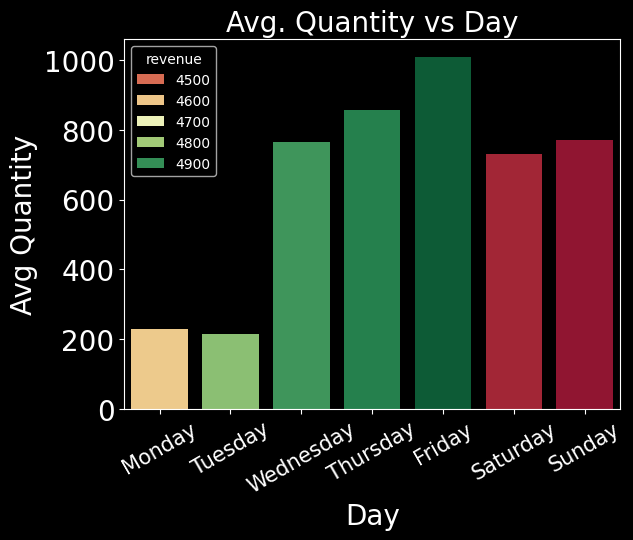

In [391]:
sns.barplot(days , x = 'day' , y = 'quantity' , hue = 'revenue' , palette = 'RdYlGn')
plt.xticks(rotation = 30 , fontsize = 15)
plt.xlabel('Day' , fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Avg Quantity' , fontsize = 20)
plt.title('Avg. Quantity vs Day' , fontsize = 20)
plt.savefig('./images/q20.1.png')

### **📈 High-Performing Days:**

- Friday: ~1008 units/day

- Thursday: ~855 units/day

- Wednesday: ~765 units/day

* These mid-to-late week days are the most productive for sales volume.

---

### **📉 Low-Performing Days:**

- Tuesday: ~214 units/day

- Monday: ~230 units/day

- Early-week days are consistently underperforming in terms of order quantity.

---

### **🎯 Strategic Recommendations to Boost Sales on Slower Days:**

**🛍️ 1. Flash Sales or Daily Deals (Mon–Tues)**

- Run “Monday Kickstart Deals” or “Tuesday Temptations” to drive urgency.

- Offer time-limited discounts only valid on slower days.

**🎁 2. Personalized Email Campaigns**

- Target dormant users with incentives early in the week:

- Example: “Come back today and get 10% off – only this Tuesday!”

**🎯 3. Gamify Slow Days**

- Use loyalty points multipliers or spin-the-wheel promos to incentivize weekday purchases.

**🚚 4. Free Shipping or Delivery Coupons**

- Offer free shipping for orders placed on low-performing days.

**📢 5. Marketing Spend Adjustment**

- Shift a portion of online ad budget (e.g., Google Ads or Facebook retargeting) toward Mon–Tues.
